# **Heart Disease Prediction**

## **Exploratory Data Analysis (EDA)**
This notebook focuses on performing a detailed exploratory data analysis (EDA) to characterize the dataset and gain deeper insights into its structure and attributes. The goal is to identify potential data preparation steps, feature engineering needs, and the feasibility of implementing a heuristic model for the Heart Disease Project.

The insights gained from this analysis will be fundamental for data preprocessing and model development in the next steps of the project.

`Simón Correa Marín`


### **1. Import Libraries and Configurations**

In [1]:
import sys
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import pyarrow as pa
import matplotlib.pyplot as plt

In [2]:
# configuration to show only 2 decimal places
pd.set_option("display.float_format", "{:.2f}".format)

In [3]:
# print library version for reproducibility

print("Python version: ", sys.version)
print("Pandas version: ", pd.__version__)

Python version:  3.12.9 (v3.12.9:fdb81425a9a, Feb  4 2025, 12:21:36) [Clang 13.0.0 (clang-1300.0.29.30)]
Pandas version:  2.2.3


### **2. Load Data**

In [4]:
DATA_DIR = Path.cwd().resolve().parents[0] / "data"

hd_df = pd.read_parquet(
    DATA_DIR / "02_intermediate/hd_type_fixed.parquet", engine="pyarrow"
)

### **3. Data Description**

In [5]:
hd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6848 entries, 0 to 6847
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   rest_ecg    6392 non-null   category
 1   ca          6479 non-null   float64 
 2   thal        6552 non-null   category
 3   max_hr      6453 non-null   float64 
 4   exang       6848 non-null   bool    
 5   old_peak    6763 non-null   float64 
 6   chol        6643 non-null   float64 
 7   rest_bp     6655 non-null   float64 
 8   chest_pain  6648 non-null   category
 9   disease     6848 non-null   bool    
 10  sex         6692 non-null   category
 11  fbs         6848 non-null   bool    
 12  slope       6492 non-null   float64 
 13  age         6763 non-null   float64 
dtypes: bool(3), category(4), float64(7)
memory usage: 422.0 KB


In [6]:
# Convert columns to categorical again 
categorical_cols = ["chest_pain", "slope", "ca", "rest_ecg", "thal", "sex"]

# Categorical
hd_df[categorical_cols] = hd_df[categorical_cols].astype("category")

In [7]:
hd_df.shape

(6848, 14)

In [8]:
hd_df.sample(3)

,rest_ecg,ca,thal,max_hr,exang,old_peak,chol,rest_bp,chest_pain,disease,sex,fbs,slope,age
3688,left ventricular hypertrophy,0.00,normal,185.00,False,45.00,260.00,115.00,asymptomatic,False,Male,False,1.00,45.00
4533,normal,1.00,reversable,161.00,False,61.00,203.00,148.00,asymptomatic,True,Male,False,1.00,61.00
6621,normal,0.00,normal,170.00,False,54.00,304.00,135.00,nonanginal,False,Female,True,1.00,54.00


In [9]:
# Number of missing values
hd_df.isnull().sum()

rest_ecg      456
ca            369
thal          296
max_hr        395
exang           0
old_peak       85
chol          205
rest_bp       193
chest_pain    200
disease         0
sex           156
fbs             0
slope         356
age            85
dtype: int64

**Target =** Disease

#### **Numerical Variables**

In [10]:
hd_df.describe()

,max_hr,old_peak,chol,rest_bp,age
count,6453.00,6763.00,6643.00,6655.00,6763.00
mean,149.81,54.43,246.34,131.70,54.43
std,22.71,9.00,50.07,17.55,9.00
min,71.00,29.00,126.00,94.00,29.00
25%,134.00,48.00,212.00,120.00,48.00
50%,153.00,56.00,241.00,130.00,56.00
75%,166.00,61.00,275.00,140.00,61.00
max,202.00,77.00,564.00,200.00,77.00


#### **Categorical Variables**

In [11]:
# categorical columns description
hd_df.describe(include="category")

,rest_ecg,ca,thal,chest_pain,sex,slope
count,6392,6479.00,6552,6648,6692,6492.00
unique,3,4.00,3,4,2,3.00
top,left ventricular hypertrophy,0.00,normal,asymptomatic,Male,1.00
freq,3172,3815.00,3640,3156,4546,3038.00


#### **Boolean Variables**

In [12]:
# boolean columns description
hd_df.describe(include="boolean")

,exang,disease,fbs
count,6848,6848,6848
unique,2,2,2
top,False,False,False
freq,4362,3570,5637


### **4. Univariate Analysis**

#### **Target Variable**

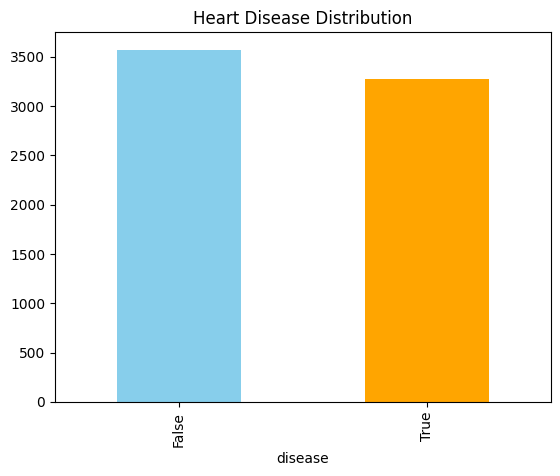

In [13]:
hd_df["disease"].value_counts().plot(
    kind="bar", color=["skyblue", "orange"], title="Heart Disease Distribution"
);

#### **Numerical Variables**

In [14]:
# list of the numerical columns
numerical_columns = list(hd_df.select_dtypes(include=["number"]).columns)
numerical_columns


['max_hr', 'old_peak', 'chol', 'rest_bp', 'age']

In [46]:
def univariate_analysis_num(column, hist_bins):
    """
    Function to plot univariate analysis for numerical columns
    """

    # Statistics
    stats = hd_df[column].describe().to_frame()
    unique_values = pd.DataFrame({"Unique Values": [hd_df[column].nunique()]})
    missing_values = pd.DataFrame({"Missing Values": [hd_df[column].isnull().sum()]})

    # Display tables properly formatted
    display(stats)
    display(unique_values)
    display(missing_values)

    # Title
    plt.figure(figsize=(12, 5))
    plt.suptitle(f"Univariate Analysis - {column}", fontsize=14, fontweight="bold")

    # Histogram
    plt.subplot(1, 3, 1)
    plt.hist(hd_df[column], bins=hist_bins, edgecolor="black")
    plt.title("Histogram")

    # Density plot
    plt.subplot(1, 3, 2)
    hd_df[column].plot(kind="density")
    plt.title("Density Plot")

    # Boxplot
    plt.subplot(1, 3, 3)
    hd_df[column].plot(kind="box")
    plt.title("Boxplot")

    # Layout
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    return None


**max_hr**

,max_hr
count,6453.00
mean,149.81
std,22.71
min,71.00
25%,134.00
50%,153.00
75%,166.00
max,202.00


,Unique Values
0,91


,Missing Values
0,395


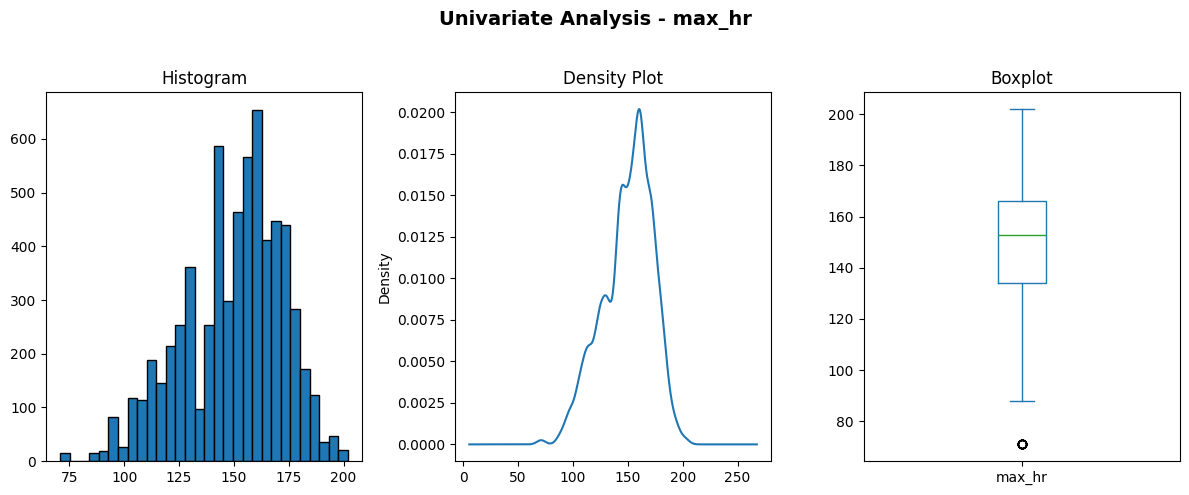

In [47]:
univariate_analysis_num("max_hr", 30)

**old_peak**

count   6763.00
mean      54.43
std        9.00
min       29.00
25%       48.00
50%       56.00
75%       61.00
max       77.00
Name: old_peak, dtype: float64


Unique values: 41 

Missing values: 85


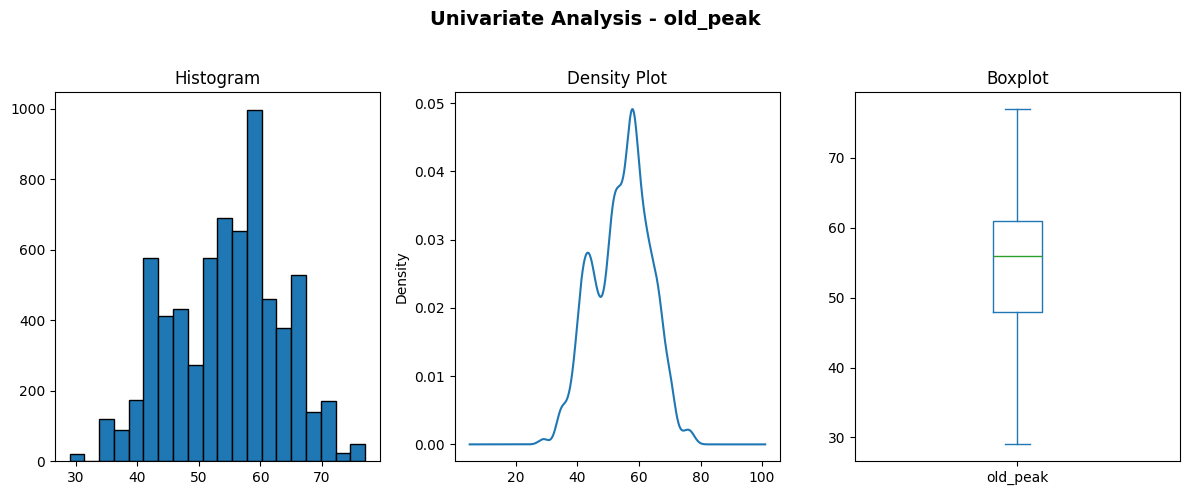

In [17]:
univariate_analysis_num("old_peak", 20)

**chol**

count   6643.00
mean     246.34
std       50.07
min      126.00
25%      212.00
50%      241.00
75%      275.00
max      564.00
Name: chol, dtype: float64


Unique values: 152 

Missing values: 205


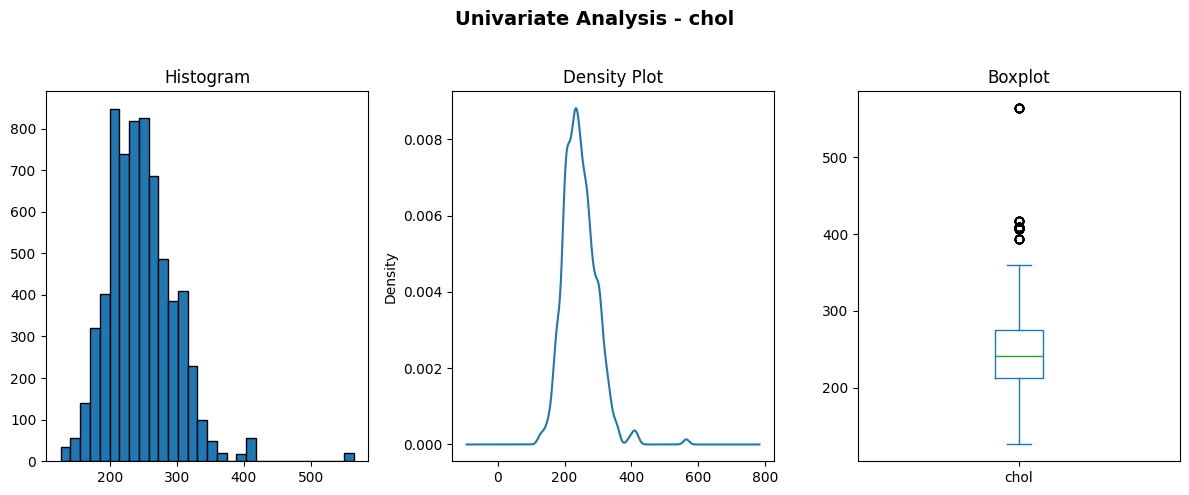

In [18]:
univariate_analysis_num("chol", 30)

**rest_bp**

count   6655.00
mean     131.70
std       17.55
min       94.00
25%      120.00
50%      130.00
75%      140.00
max      200.00
Name: rest_bp, dtype: float64


Unique values: 50 

Missing values: 193


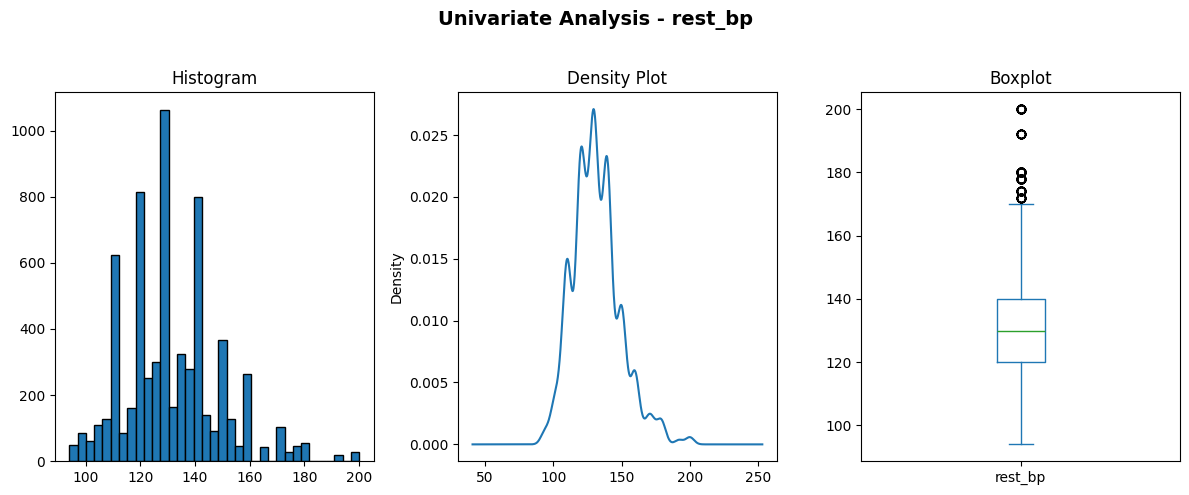

In [19]:
univariate_analysis_num("rest_bp", 35)

**age**

count   6763.00
mean      54.43
std        9.00
min       29.00
25%       48.00
50%       56.00
75%       61.00
max       77.00
Name: age, dtype: float64


Unique values: 41 

Missing values: 85


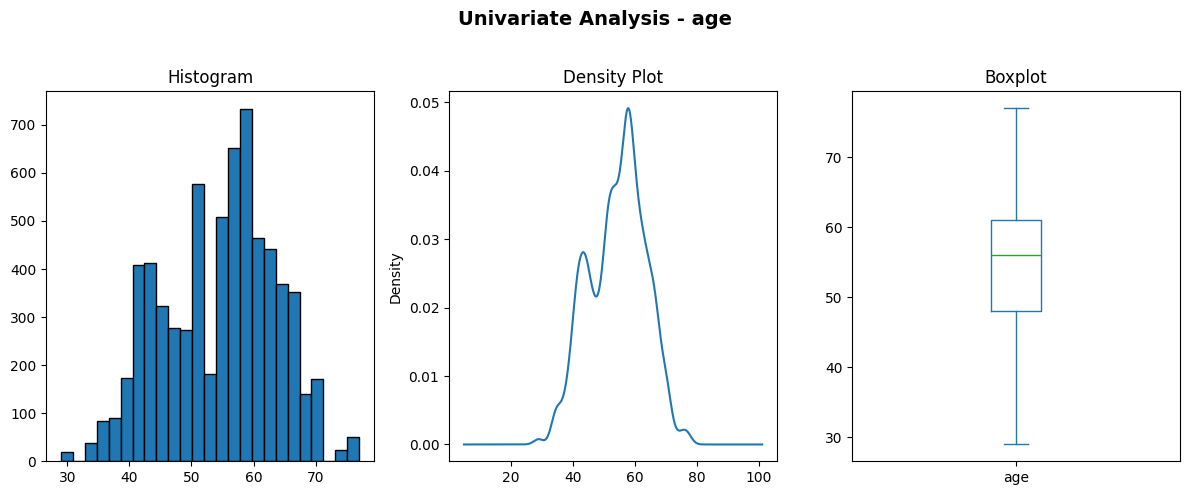

In [20]:
univariate_analysis_num("age", 25)

#### **Categorical and Boolean Variables**

In [21]:
# list of the categorical columns
categorical_columns = list(hd_df.select_dtypes(include=["category", "boolean"]).columns)
categorical_columns


['rest_ecg',
 'ca',
 'thal',
 'exang',
 'chest_pain',
 'disease',
 'sex',
 'fbs',
 'slope']

In [50]:
def univariate_analysis_cat(column):
    """
    Function to plot univariate analysis for categorical columns
    """

    # Statistics
    stats = hd_df[column].describe().to_frame() # Convert stats to DataFrame
    unique_values = pd.DataFrame({"Unique Values": [hd_df[column].nunique()]})
    missing_values = pd.DataFrame({"Missing Values": [hd_df[column].isnull().sum()]})
    freq_table = hd_df[column].value_counts().to_frame().reset_index()
    freq_table.columns = [column, "Count"]  # Rename columns for clarity

    # Display tables properly formatted
    display(stats)
    display(unique_values)
    display(missing_values)
    display(freq_table)

    # Title
    plt.suptitle(f"Univariate Analysis - {column}", fontsize=14, fontweight="bold")

    # Bar plot
    plt.bar(hd_df[column].value_counts().index, hd_df[column].value_counts().values, 
            color=["skyblue", "orange", "green"])
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.title("Value Counts")

    # Layout
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    return None


**rest_ecg**

,rest_ecg
count,6392
unique,3
top,left ventricular hypertrophy
freq,3172


,Unique Values
0,3


,Missing Values
0,456


,rest_ecg,Count
0,left ventricular hypertrophy,3172
1,normal,3143
2,ST-T wave abnormality,77


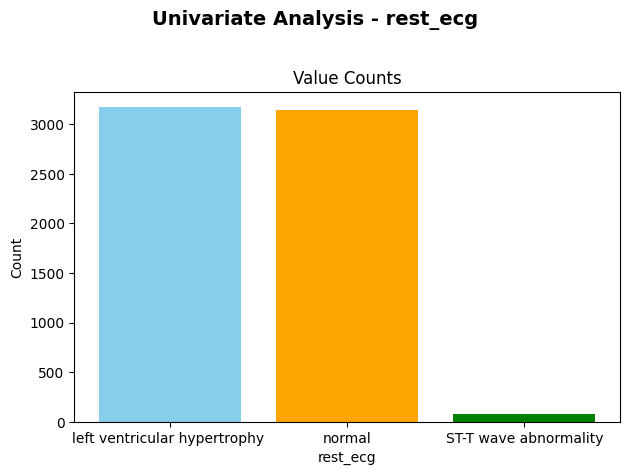

In [51]:
univariate_analysis_cat("rest_ecg")

**ca**

count    6479.00
unique      4.00
top         0.00
freq     3815.00
Name: ca, dtype: float64


Unique values: 4
Missing values: 369

ca
0.00    3815
1.00    1436
2.00     789
3.00     439
Name: count, dtype: int64


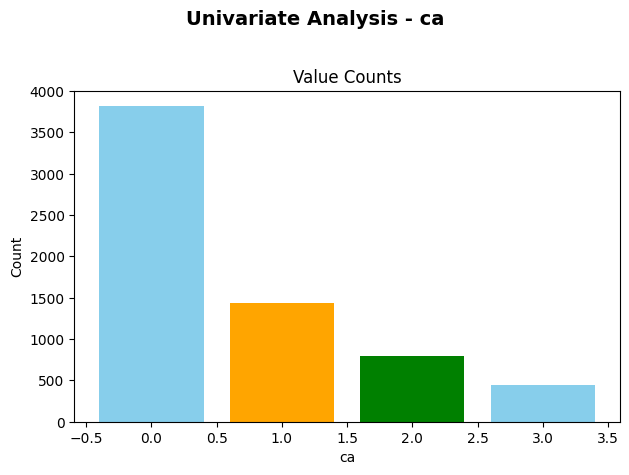

In [24]:
univariate_analysis_cat("ca")

**thal**

count       6552
unique         3
top       normal
freq        3640
Name: thal, dtype: object


Unique values: 3
Missing values: 296

thal
normal        3640
reversable    2507
fixed          405
Name: count, dtype: int64


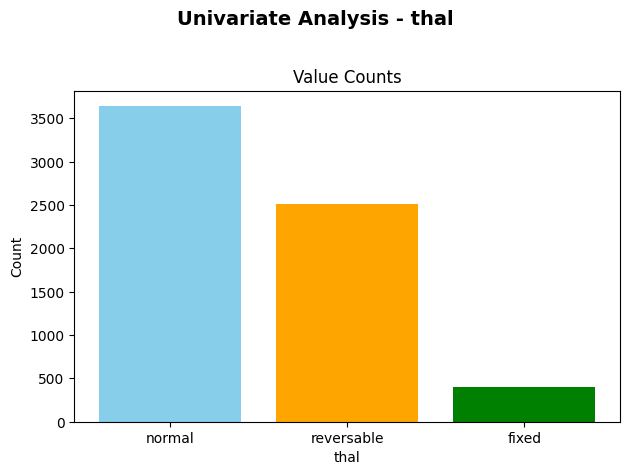

In [25]:
univariate_analysis_cat("thal")

**exang**

count      6848
unique        2
top       False
freq       4362
Name: exang, dtype: object


Unique values: 2
Missing values: 0

exang
False    4362
True     2486
Name: count, dtype: int64


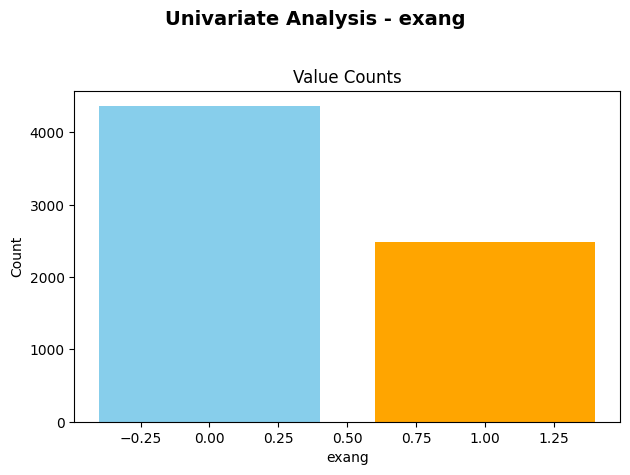

In [26]:
univariate_analysis_cat("exang")

**chest_pain**

count             6648
unique               4
top       asymptomatic
freq              3156
Name: chest_pain, dtype: object


Unique values: 4
Missing values: 200

chest_pain
asymptomatic    3156
nonanginal      1917
nontypical      1064
typical          511
Name: count, dtype: int64


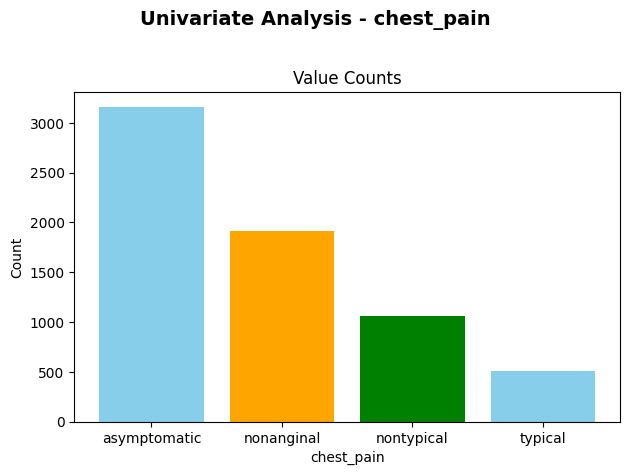

In [27]:
univariate_analysis_cat("chest_pain")

**sex**

count     6692
unique       2
top       Male
freq      4546
Name: sex, dtype: object


Unique values: 2
Missing values: 156

sex
Male      4546
Female    2146
Name: count, dtype: int64


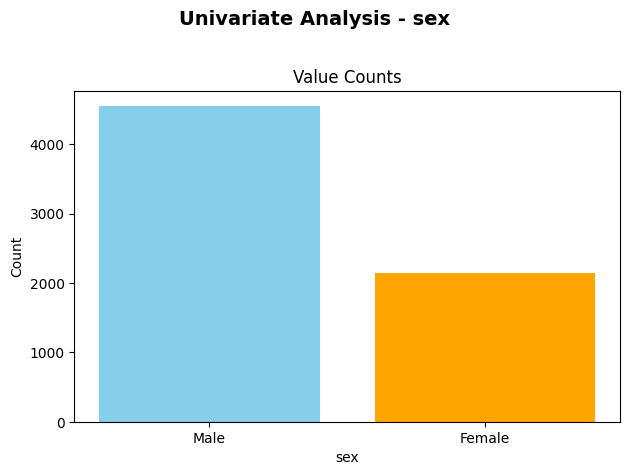

In [28]:
univariate_analysis_cat("sex")

**fbs**

count      6848
unique        2
top       False
freq       5637
Name: fbs, dtype: object


Unique values: 2
Missing values: 0

fbs
False    5637
True     1211
Name: count, dtype: int64


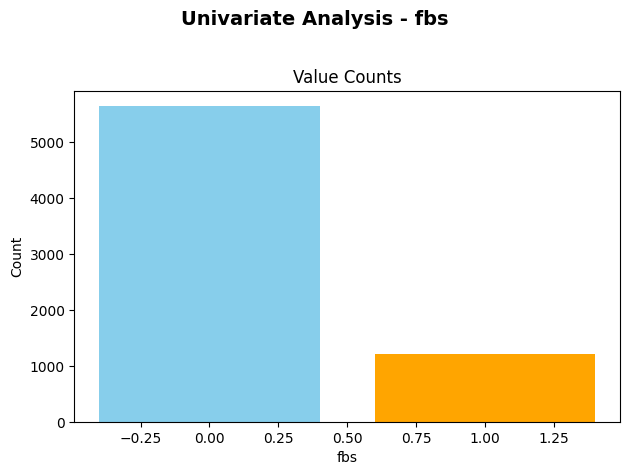

In [29]:
univariate_analysis_cat("fbs")

**slope**

count    6492.00
unique      3.00
top         1.00
freq     3038.00
Name: slope, dtype: float64


Unique values: 3
Missing values: 356

slope
1.00    3038
2.00    2972
3.00     482
Name: count, dtype: int64


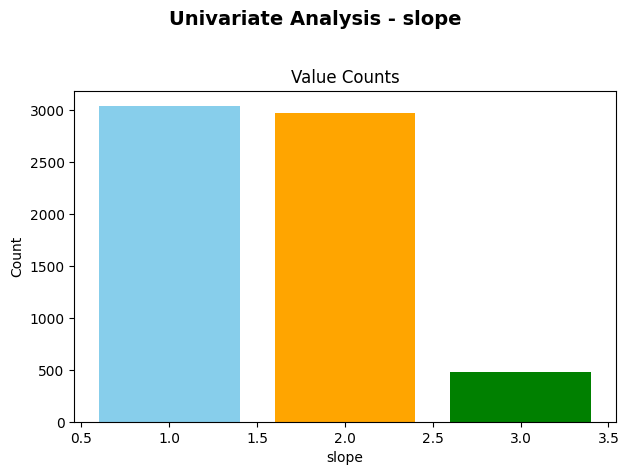

In [30]:
univariate_analysis_cat("slope")

**disease**

count      6848
unique        2
top       False
freq       3570
Name: disease, dtype: object


Unique values: 2
Missing values: 0

disease
False    3570
True     3278
Name: count, dtype: int64


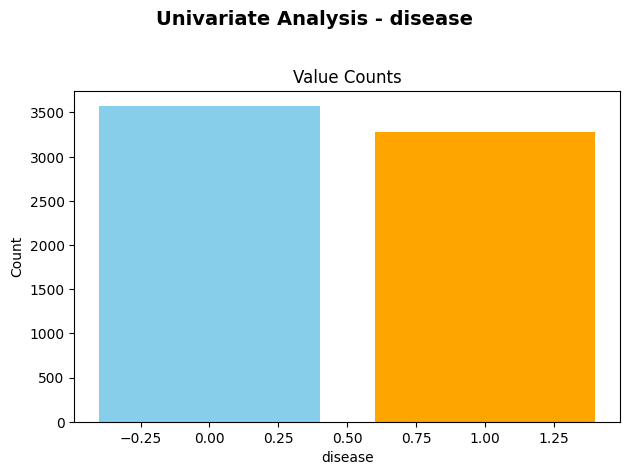

In [31]:
univariate_analysis_cat("disease")

### **5. Bivariate Analysis**

Relationships between the target variables and the features.

#### **Target vs Numerical Variables**

In [32]:
def bivariate_analysis_num(column):
    """
    Function to plot bivariate analysis for numerical columns
    """

    # Title
    plt.figure(figsize=(10, 5))
    plt.suptitle(f"Disease vs {column}", fontsize=14, fontweight="bold")

    # Boxplot
    plt.subplot(1, 3, 1)
    sns.boxplot(x="disease", y=column, data=hd_df)
    plt.title("Boxplot")

    # Density plot
    plt.subplot(1, 3, 2)
    sns.kdeplot(hd_df[hd_df["disease"] == 1][column], label="Has disease", fill=True)
    sns.kdeplot(hd_df[hd_df["disease"] == 0][column], label="Has not disease", fill=True)
    plt.title("Density Plot")
    plt.legend(fontsize=8)

    # Histogram
    plt.subplot(1, 3, 3)
    sns.histplot(hd_df, x=column, hue="disease", kde=True, bins=20)
    plt.title("Histogram")

    # Visualizations
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    return None

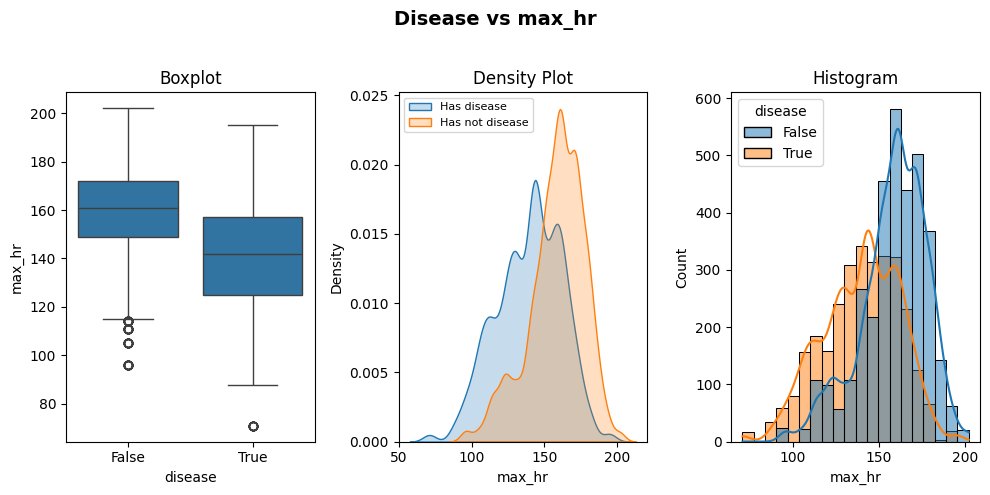

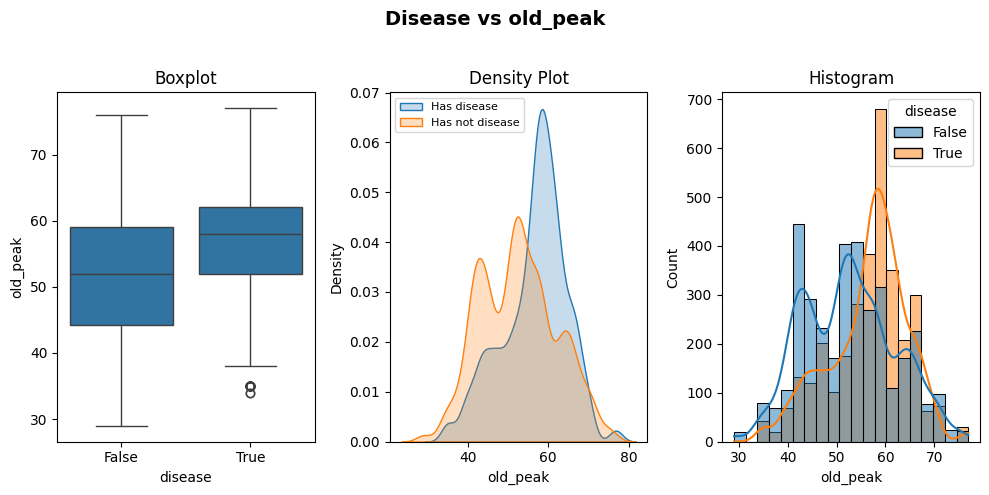

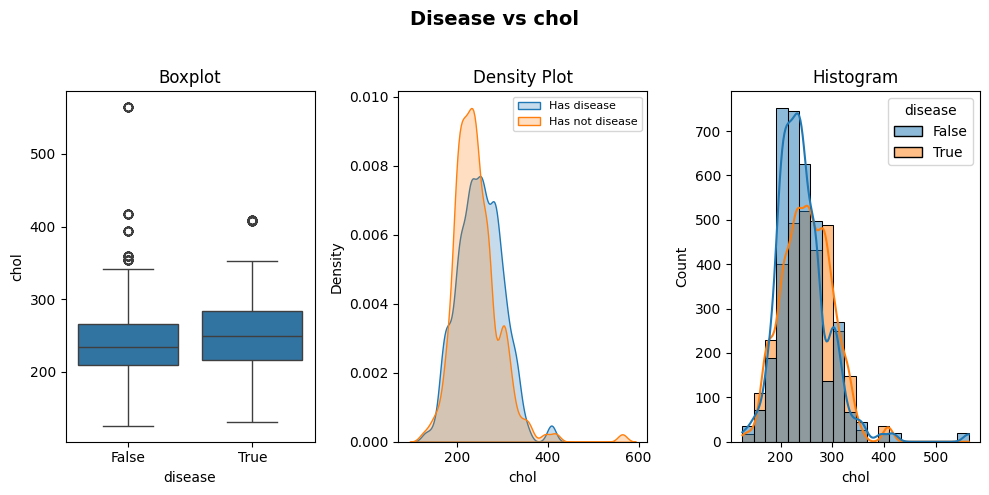

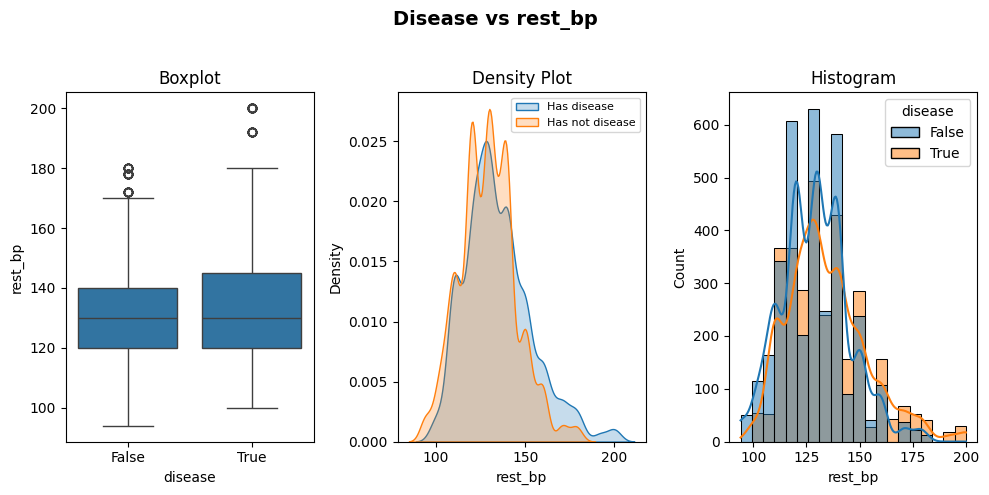

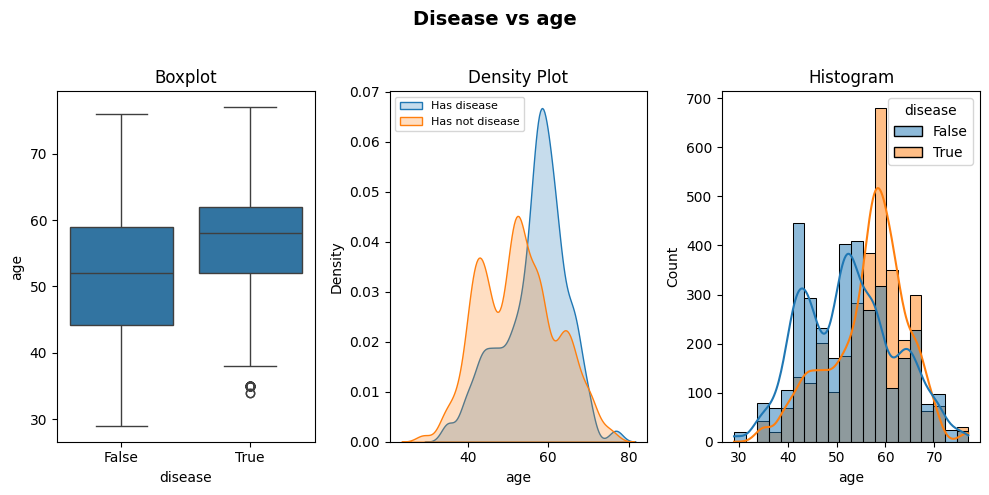

In [33]:
# Bivariate analysis for numerical columns
for col in numerical_columns:
    bivariate_analysis_num(col)

#### **Target vs Categorical Variables**

In [52]:
def bivariate_analysis_cat(column):
    """
    Function to plot bivariate analysis for categorical columns
    """

    # Crosstab table 
    crosstab_table = pd.crosstab(hd_df[column], hd_df["disease"], margins=True)
    display(crosstab_table.style.background_gradient(cmap="coolwarm").set_caption(f"Crosstab: Disease vs {column}"))

    # Percentage of cases with disease for each category
    disease_percentage = hd_df.groupby(column, observed=True)["disease"].mean() * 100
    disease_percentage_df = disease_percentage.to_frame(name="Percentage with Disease")
    display(disease_percentage_df.style.format("{:.2f}%").set_caption(f"Percentage of Cases with Disease by {column}"))

    # Title
    plt.figure(figsize=(12, 5))
    plt.suptitle(f"Disease vs {column}", fontsize=14, fontweight="bold")

    # Stacked Barplot
    plt.subplot(1, 2, 1)
    crosstab_table.iloc[:-1, :].plot(kind="bar", stacked=True, colormap="coolwarm", ax=plt.gca())  # Exclude 'All' row
    plt.title("Stacked Barplot")
    plt.xlabel(column)
    plt.ylabel("Count")

    # Regular Barplot
    plt.subplot(1, 2, 2)
    crosstab_table.iloc[:-1, :].plot(kind="bar", colormap="viridis", ax=plt.gca())  # Exclude 'All' row
    plt.title("Barplot")
    plt.xlabel(column)
    plt.ylabel("Count")

    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    return None


disease,False,True,All
rest_ecg,,,
ST-T wave abnormality,21,56,77
left ventricular hypertrophy,1457,1715,3172
normal,1962,1181,3143
All,3440,2952,6392


,Percentage with Disease
rest_ecg,
ST-T wave abnormality,72.73%
left ventricular hypertrophy,54.07%
normal,37.58%


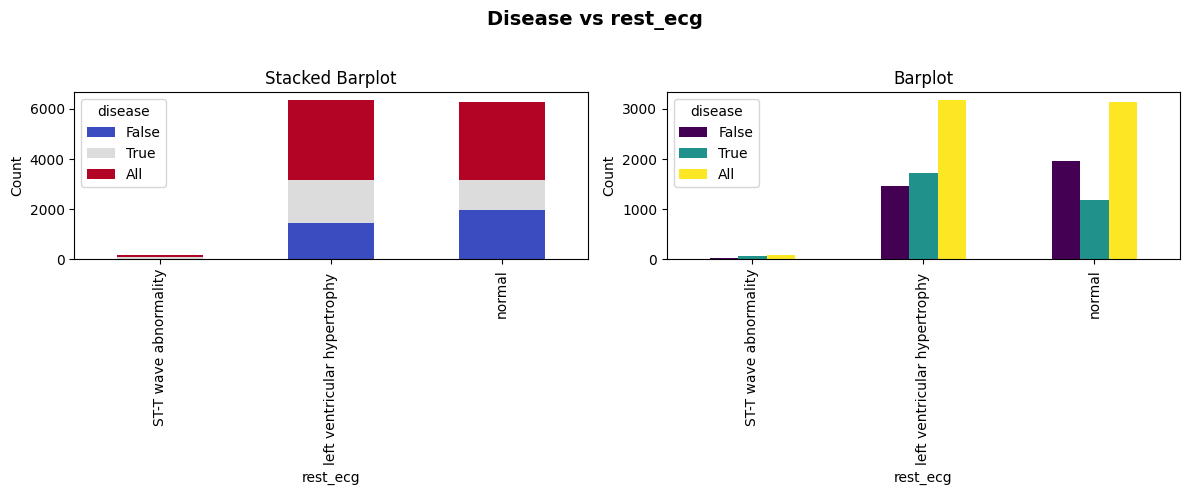

disease,False,True,All
ca,,,
0.000000,2789,1026,3815
1.000000,473,963,1436
2.000000,145,644,789
3.000000,66,373,439
All,3473,3006,6479


,Percentage with Disease
ca,
0.000000,26.89%
1.000000,67.06%
2.000000,81.62%
3.000000,84.97%


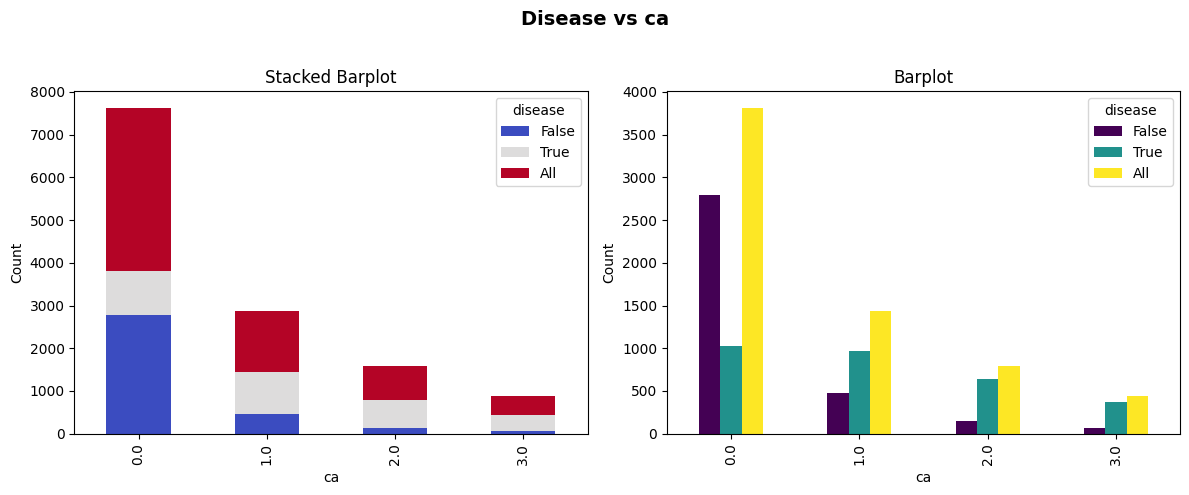

disease,False,True,All
thal,,,
fixed,127,278,405
normal,2817,823,3640
reversable,576,1931,2507
All,3520,3032,6552


,Percentage with Disease
thal,
fixed,68.64%
normal,22.61%
reversable,77.02%


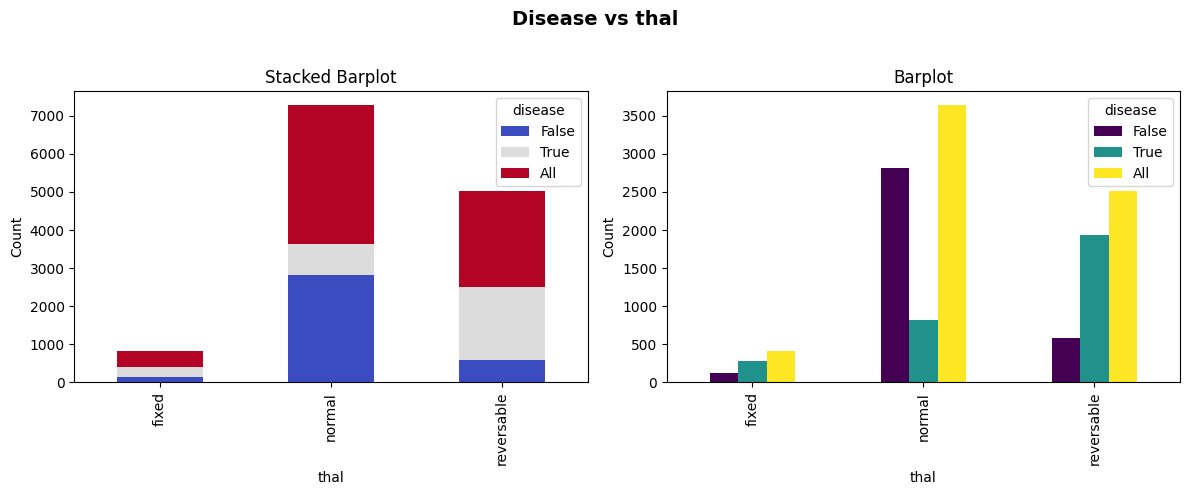

disease,False,True,All
exang,,,
False,2981,1381,4362
True,589,1897,2486
All,3570,3278,6848


,Percentage with Disease
exang,
False,31.66%
True,76.31%


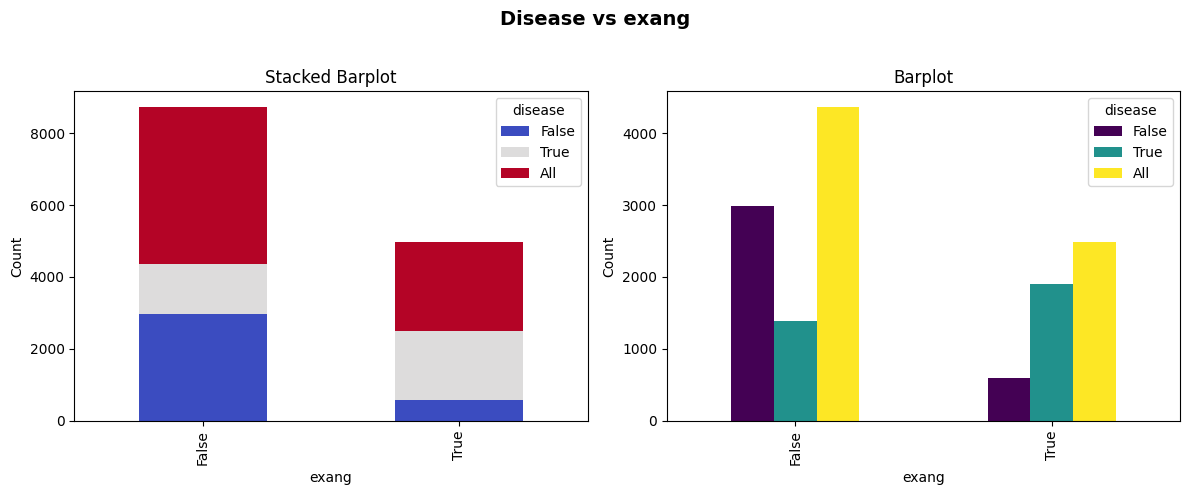

disease,False,True,All
chest_pain,,,
asymptomatic,839,2317,3156
nonanginal,1476,441,1917
nontypical,830,234,1064
typical,344,167,511
All,3489,3159,6648


,Percentage with Disease
chest_pain,
asymptomatic,73.42%
nonanginal,23.00%
nontypical,21.99%
typical,32.68%


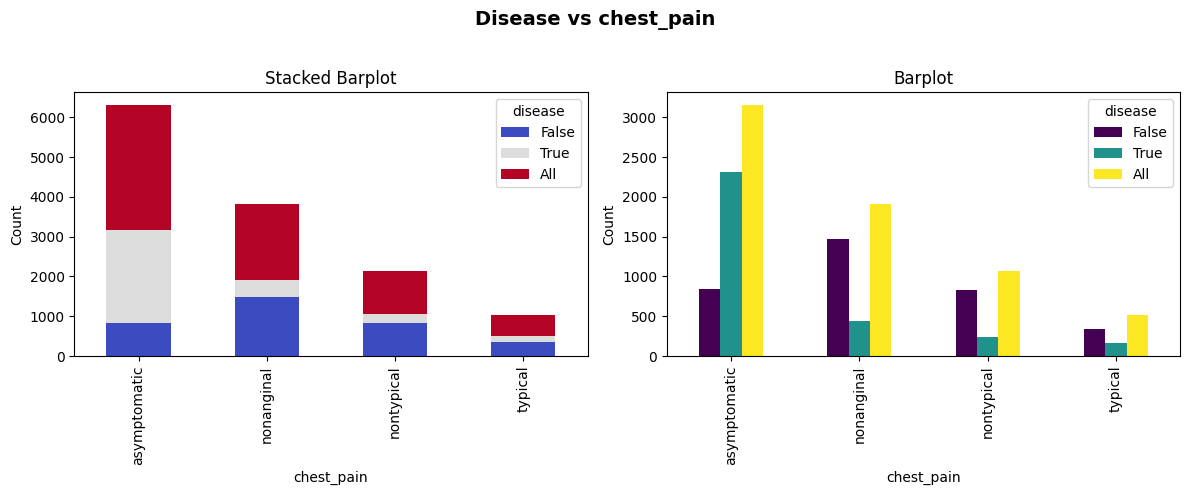

disease,False,True,All
sex,,,
Female,1526,620,2146
Male,1976,2570,4546
All,3502,3190,6692


,Percentage with Disease
sex,
Female,28.89%
Male,56.53%


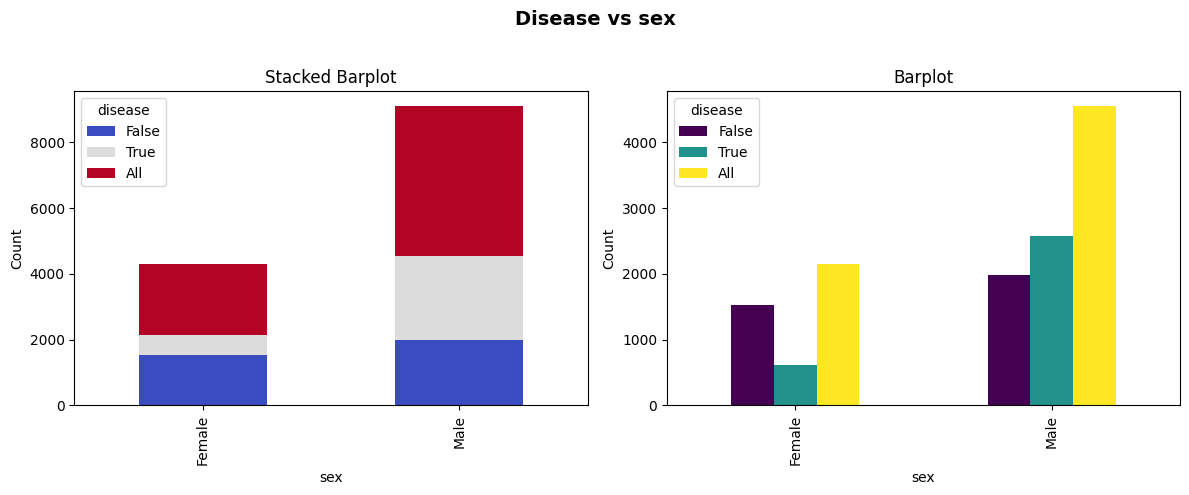

disease,False,True,All
fbs,,,
False,2984,2653,5637
True,586,625,1211
All,3570,3278,6848


,Percentage with Disease
fbs,
False,47.06%
True,51.61%


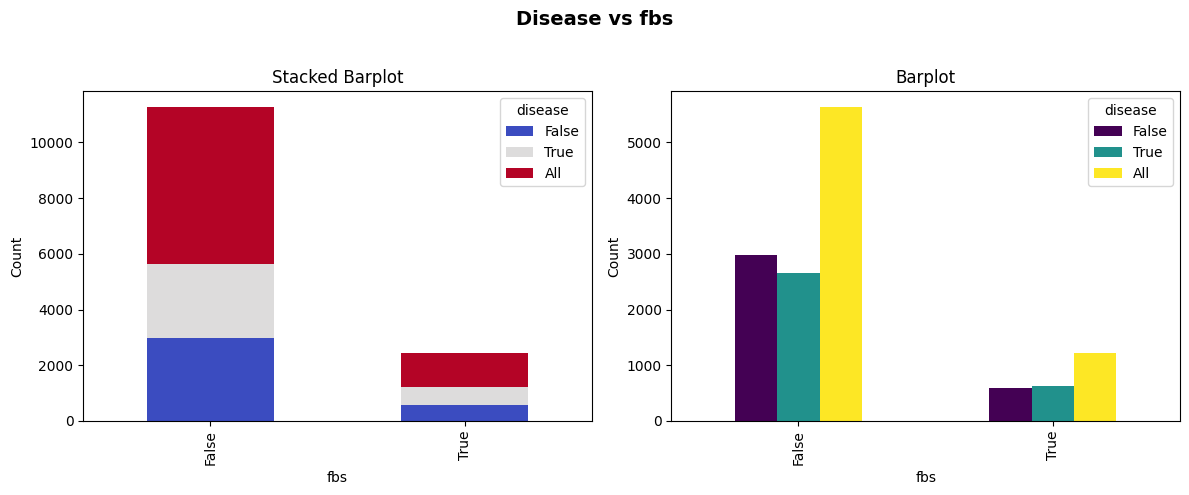

disease,False,True,All
slope,,,
1.000000,2273,765,3038
2.000000,1020,1952,2972
3.000000,211,271,482
All,3504,2988,6492


,Percentage with Disease
slope,
1.000000,25.18%
2.000000,65.68%
3.000000,56.22%


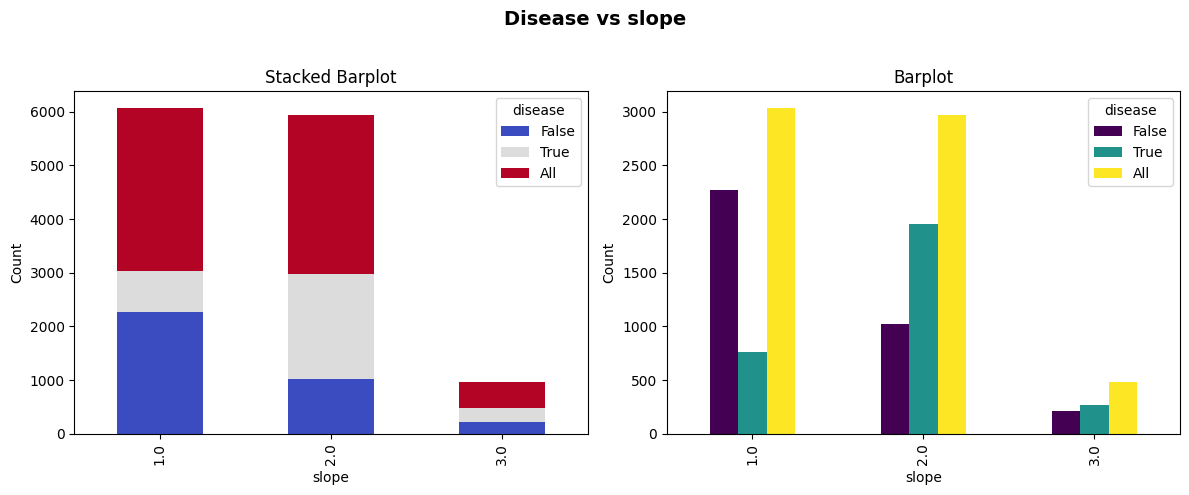

In [53]:
# Bivariate analysis for categorical columns
for col in [c for c in categorical_columns if c != "disease"]:
    bivariate_analysis_cat(col)

#### **Numerical vs Numerical Variables**

In [36]:
def bivariate_analysis_num_vs_num(target, numerical_columns):
    """
    Function to plot scatter plots of a numerical column against all other numerical columns.
    
    Parameters:
    - target_column: The numerical column to compare against others.
    - numerical_columns: List of numerical column names.
    """

    nums = [col for col in numerical_columns if col != target]  # Exclude target column

    plt.figure(figsize=(18, len(nums)))  # Dynamic figure size based on number of comparisons
    plt.suptitle(f"{target} vs Other Numerical Variables", fontsize=14, fontweight="bold")

    for i, col in enumerate(nums, 1):
        plt.subplot(1, len(nums), i)
        hd_df.plot(kind="scatter", x=target, y=col, title=f"{target} vs {col}", ax=plt.gca())

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to avoid overlap
    plt.show()

    return None


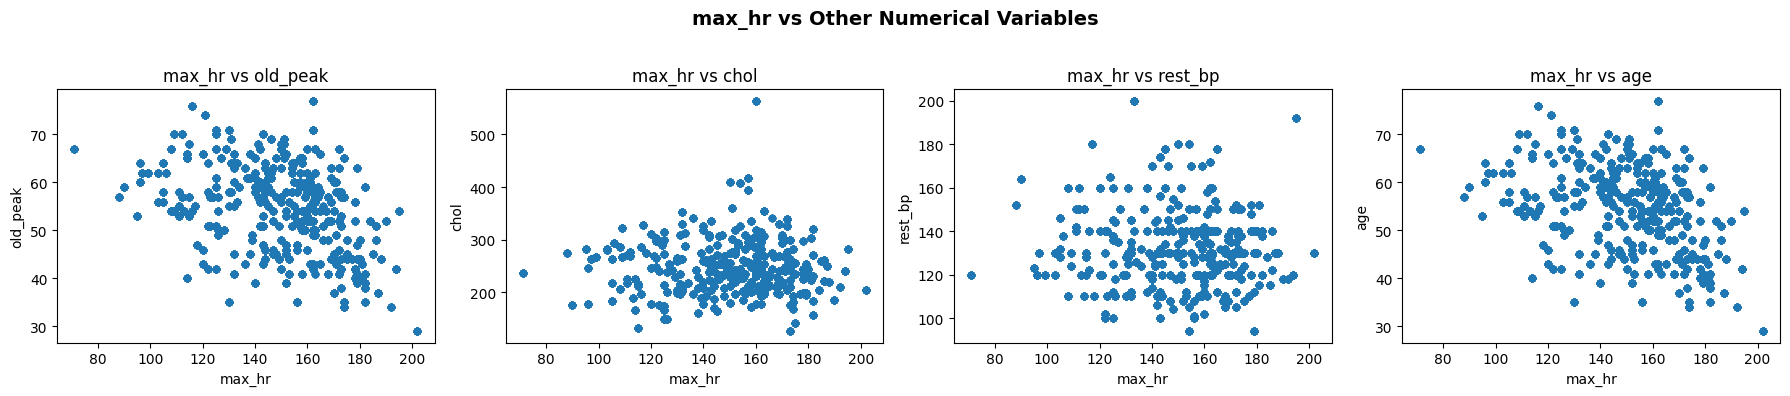

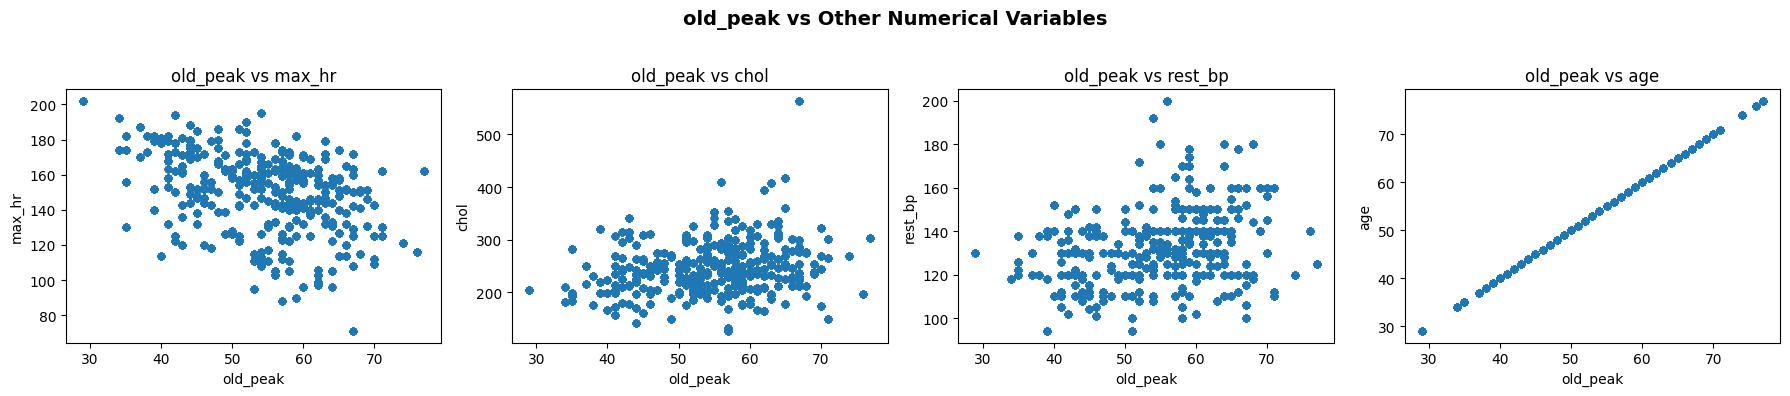

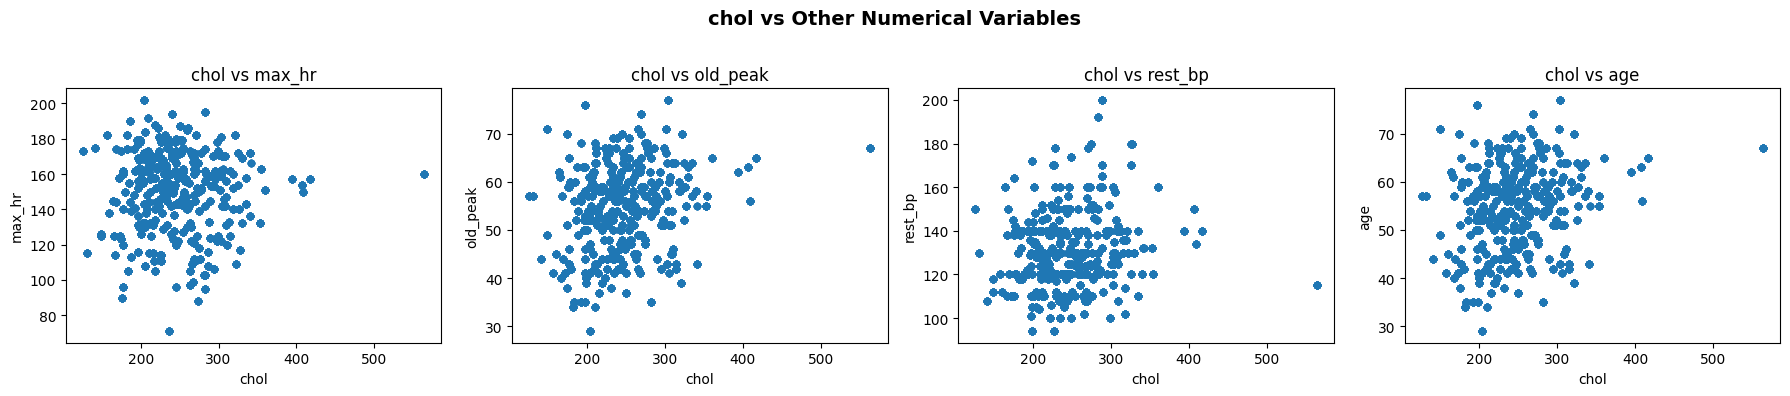

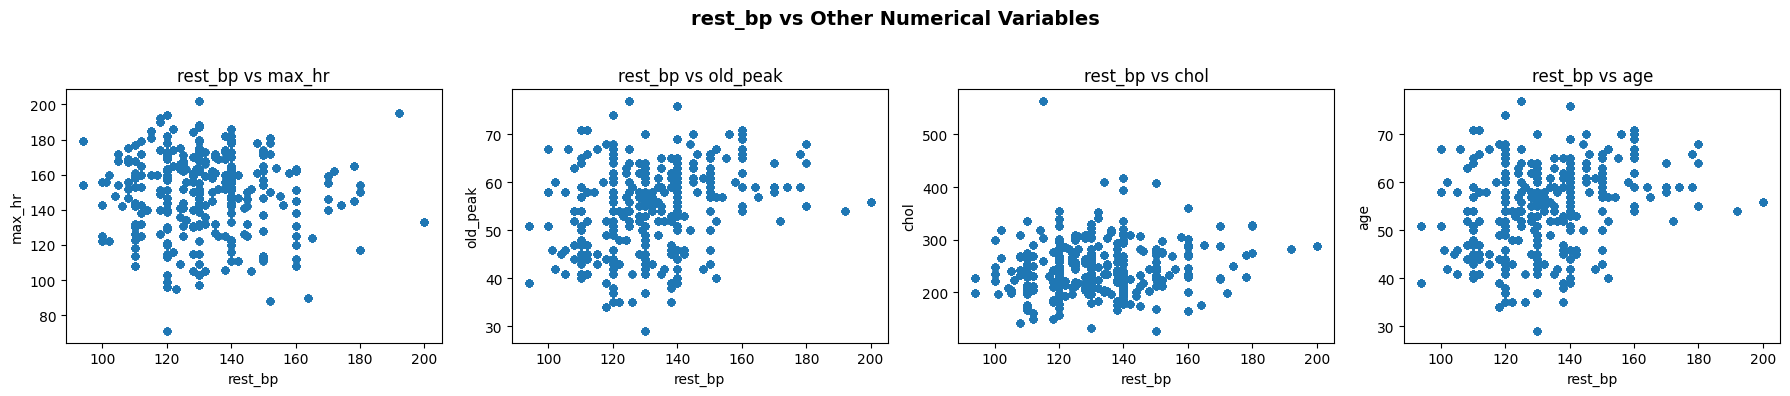

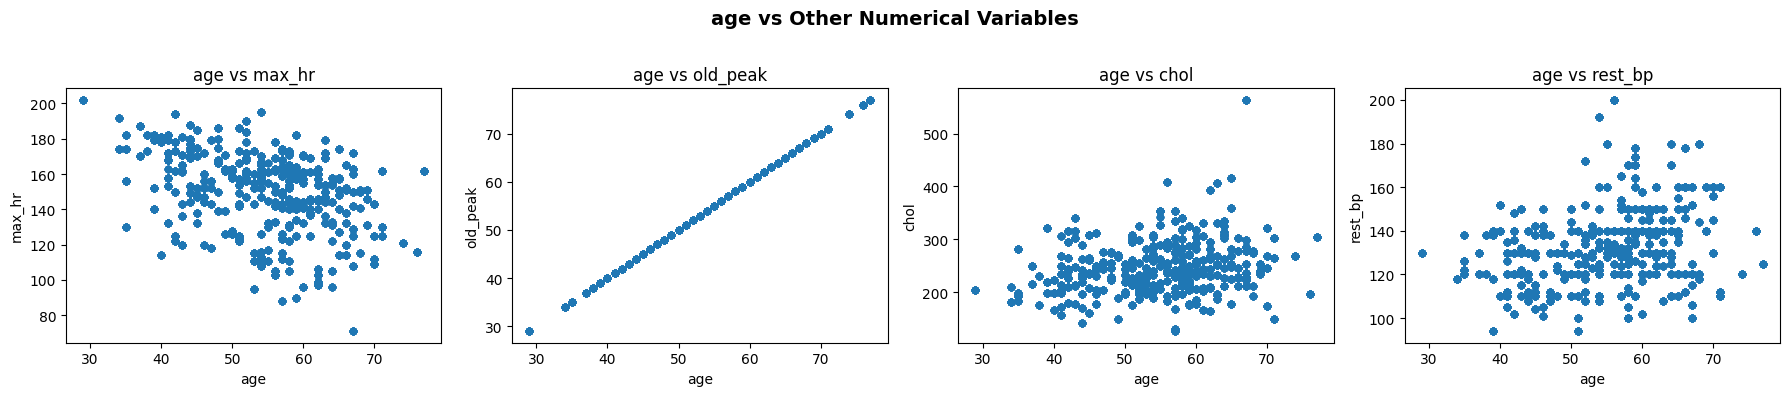

In [37]:
for col in numerical_columns:
    bivariate_analysis_num_vs_num(col, numerical_columns)

#### **Categorical vs Categorical Variables**

In [ ]:
def bivariate_analysis_cat_vs_cat(target, categorical_columns):
    """
    Function to analyze relationships between a categorical column and all other categorical columns.
    
    Parameters:
    - target: The categorical column to compare against others.
    - categorical_columns: List of categorical column names.
    """

    cats = [col for col in categorical_columns if col != target]  # Exclude target column

    plt.figure(figsize=(5 * len(cats), 5))  # Dynamic figure size
    plt.suptitle(f"{target} vs Other Categorical Variables", fontsize=14, fontweight="bold")

    for i, col in enumerate(cats, 1):
        plt.subplot(1, len(cats), i)

        # Crosstab for stacked barplot
        cross_tab = pd.crosstab(hd_df[target], hd_df[col])
        cross_tab.plot(kind="bar", stacked=True, ax=plt.gca(), title=f"{target} vs {col} Stacked Barplot")

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to prevent overlap
    plt.show()

    # Generate Crosstab Tables with Heatmap Styling
    for col in cats:
        display(
            pd.crosstab(hd_df[target], hd_df[col], margins=True)
            .style.background_gradient(cmap="coolwarm")
            .set_caption(f"{target} vs {col} Heatmap")
        )

    return None

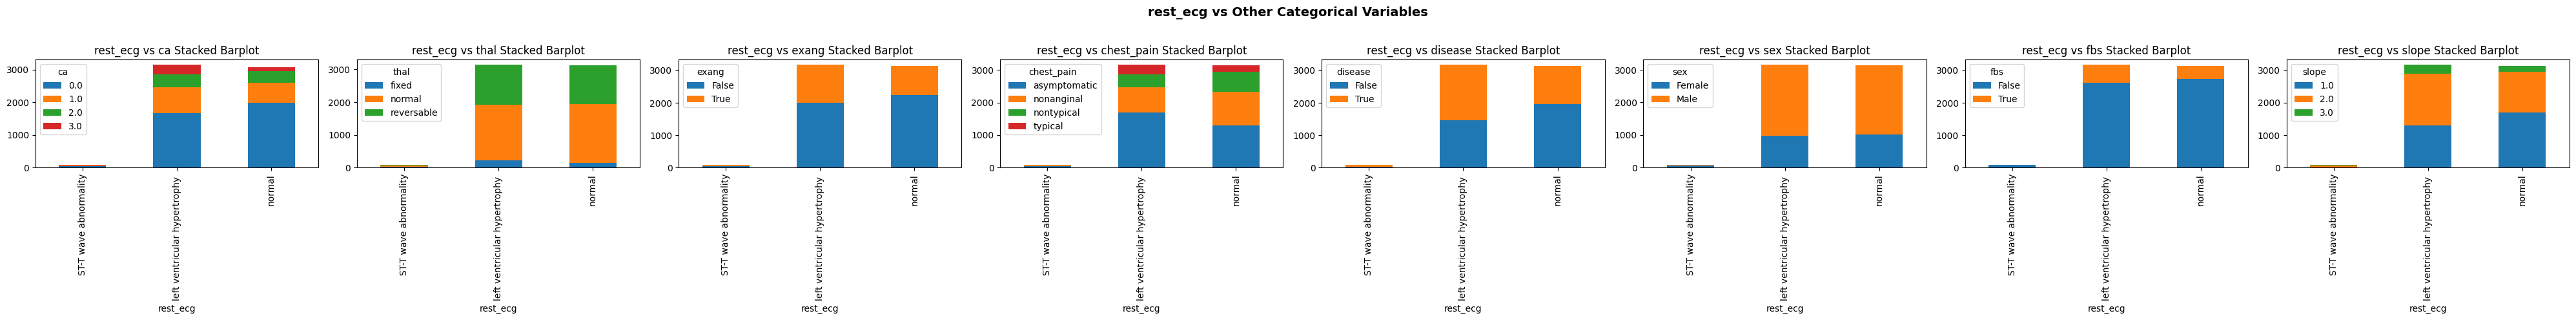


Crosstab Table: rest_ecg vs ca



ca,0.000000,1.000000,2.000000,3.000000,All
rest_ecg,,,,,
ST-T wave abnormality,44,15,0,18,77
left ventricular hypertrophy,1668,787,410,287,3152
normal,1988,608,354,128,3078
All,3700,1410,764,433,6307



Crosstab Table: rest_ecg vs thal



thal,fixed,normal,reversable,All
rest_ecg,,,,
ST-T wave abnormality,18,44,15,77
left ventricular hypertrophy,229,1690,1222,3141
normal,147,1797,1174,3118
All,394,3531,2411,6336



Crosstab Table: rest_ecg vs exang



exang,False,True,All
rest_ecg,,,
ST-T wave abnormality,41,36,77
left ventricular hypertrophy,2008,1164,3172
normal,2232,911,3143
All,4281,2111,6392



Crosstab Table: rest_ecg vs chest_pain



chest_pain,asymptomatic,nonanginal,nontypical,typical,All
rest_ecg,,,,,
ST-T wave abnormality,54,23,0,0,77
left ventricular hypertrophy,1701,767,392,301,3161
normal,1295,1039,619,187,3140
All,3050,1829,1011,488,6378



Crosstab Table: rest_ecg vs disease



disease,False,True,All
rest_ecg,,,
ST-T wave abnormality,21,56,77
left ventricular hypertrophy,1457,1715,3172
normal,1962,1181,3143
All,3440,2952,6392



Crosstab Table: rest_ecg vs sex



sex,Female,Male,All
rest_ecg,,,
ST-T wave abnormality,59,18,77
left ventricular hypertrophy,980,2175,3155
normal,1025,2115,3140
All,2064,4308,6372



Crosstab Table: rest_ecg vs fbs



fbs,False,True,All
rest_ecg,,,
ST-T wave abnormality,77,0,77
left ventricular hypertrophy,2611,561,3172
normal,2748,395,3143
All,5436,956,6392



Crosstab Table: rest_ecg vs slope



slope,1.000000,2.000000,3.000000,All
rest_ecg,,,,
ST-T wave abnormality,0,59,18,77
left ventricular hypertrophy,1294,1592,280,3166
normal,1691,1265,181,3137
All,2985,2916,479,6380


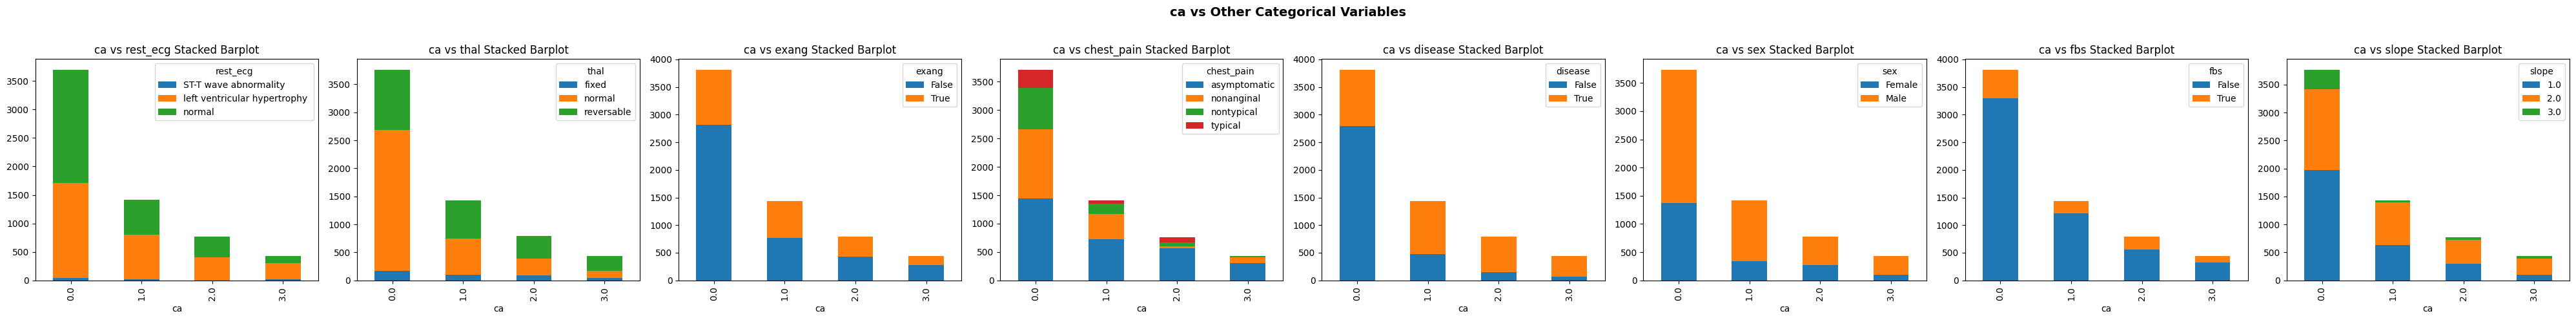


Crosstab Table: ca vs rest_ecg



rest_ecg,ST-T wave abnormality,left ventricular hypertrophy,normal,All
ca,,,,
0.000000,44,1668,1988,3700
1.000000,15,787,608,1410
2.000000,0,410,354,764
3.000000,18,287,128,433
All,77,3152,3078,6307



Crosstab Table: ca vs thal



thal,fixed,normal,reversable,All
ca,,,,
0.000000,171,2511,1080,3762
1.000000,104,640,689,1433
2.000000,86,305,398,789
3.000000,44,123,272,439
All,405,3579,2439,6423



Crosstab Table: ca vs exang



exang,False,True,All
ca,,,
0.000000,2819,996,3815
1.000000,764,672,1436
2.000000,434,355,789
3.000000,277,162,439
All,4294,2185,6479



Crosstab Table: ca vs chest_pain



chest_pain,asymptomatic,nonanginal,nontypical,typical,All
ca,,,,,
0.000000,1440,1223,723,328,3714
1.000000,726,439,182,65,1412
2.000000,569,34,66,95,764
3.000000,307,103,23,0,433
All,3042,1799,994,488,6323



Crosstab Table: ca vs disease



disease,False,True,All
ca,,,
0.000000,2789,1026,3815
1.000000,473,963,1436
2.000000,145,644,789
3.000000,66,373,439
All,3473,3006,6479



Crosstab Table: ca vs sex



sex,Female,Male,All
ca,,,
0.000000,1371,2365,3736
1.000000,339,1079,1418
2.000000,276,497,773
3.000000,95,339,434
All,2081,4280,6361



Crosstab Table: ca vs fbs



fbs,False,True,All
ca,,,
0.000000,3292,523,3815
1.000000,1211,225,1436
2.000000,562,227,789
3.000000,329,110,439
All,5394,1085,6479



Crosstab Table: ca vs slope



slope,1.000000,2.000000,3.000000,All
ca,,,,
0.000000,1971,1452,347,3770
1.000000,630,760,37,1427
2.000000,293,429,52,774
3.000000,101,289,46,436
All,2995,2930,482,6407


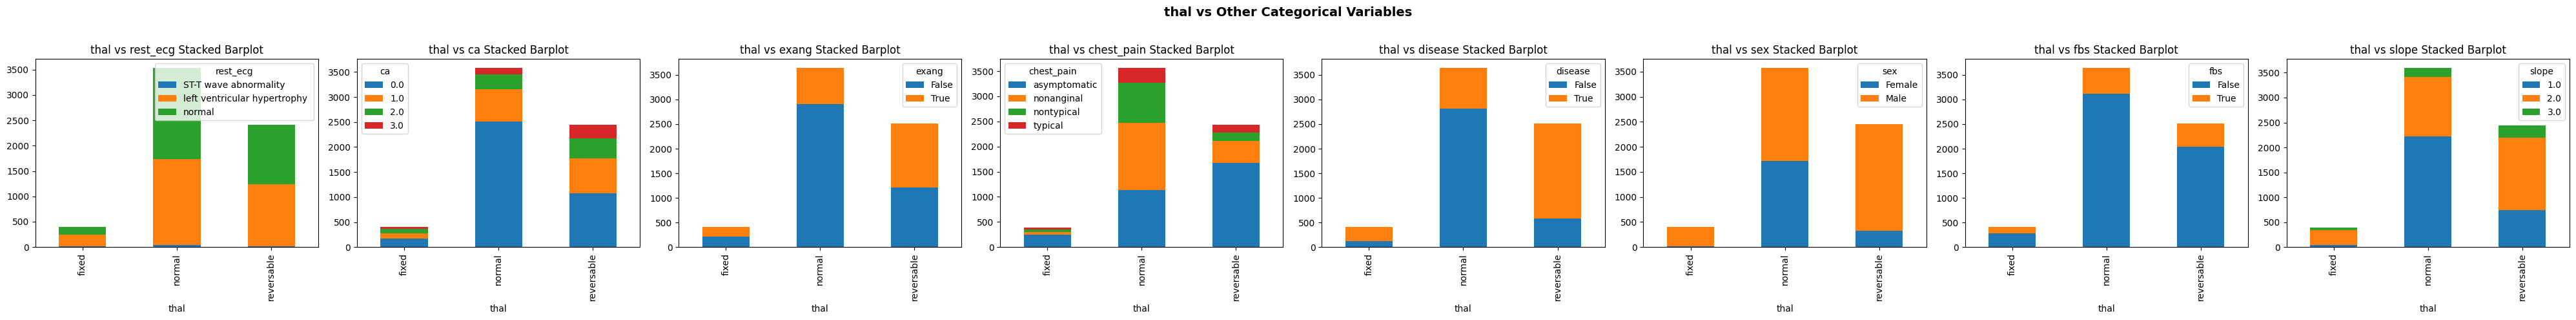


Crosstab Table: thal vs rest_ecg



rest_ecg,ST-T wave abnormality,left ventricular hypertrophy,normal,All
thal,,,,
fixed,18,229,147,394
normal,44,1690,1797,3531
reversable,15,1222,1174,2411
All,77,3141,3118,6336



Crosstab Table: thal vs ca



ca,0.000000,1.000000,2.000000,3.000000,All
thal,,,,,
fixed,171,104,86,44,405
normal,2511,640,305,123,3579
reversable,1080,689,398,272,2439
All,3762,1433,789,439,6423



Crosstab Table: thal vs exang



exang,False,True,All
thal,,,
fixed,216,189,405
normal,2902,738,3640
reversable,1208,1299,2507
All,4326,2226,6552



Crosstab Table: thal vs chest_pain



chest_pain,asymptomatic,nonanginal,nontypical,typical,All
thal,,,,,
fixed,253,50,47,41,391
normal,1134,1341,800,288,3563
reversable,1669,441,164,162,2436
All,3056,1832,1011,491,6390



Crosstab Table: thal vs disease



disease,False,True,All
thal,,,
fixed,127,278,405
normal,2817,823,3640
reversable,576,1931,2507
All,3520,3032,6552



Crosstab Table: thal vs sex



sex,Female,Male,All
thal,,,
fixed,19,384,403
normal,1721,1853,3574
reversable,326,2134,2460
All,2066,4371,6437



Crosstab Table: thal vs fbs



fbs,False,True,All
thal,,,
fixed,283,122,405
normal,3112,528,3640
reversable,2037,470,2507
All,5432,1120,6552



Crosstab Table: thal vs slope



slope,1.000000,2.000000,3.000000,All
thal,,,,
fixed,42,293,61,396
normal,2219,1201,174,3594
reversable,743,1456,247,2446
All,3004,2950,482,6436


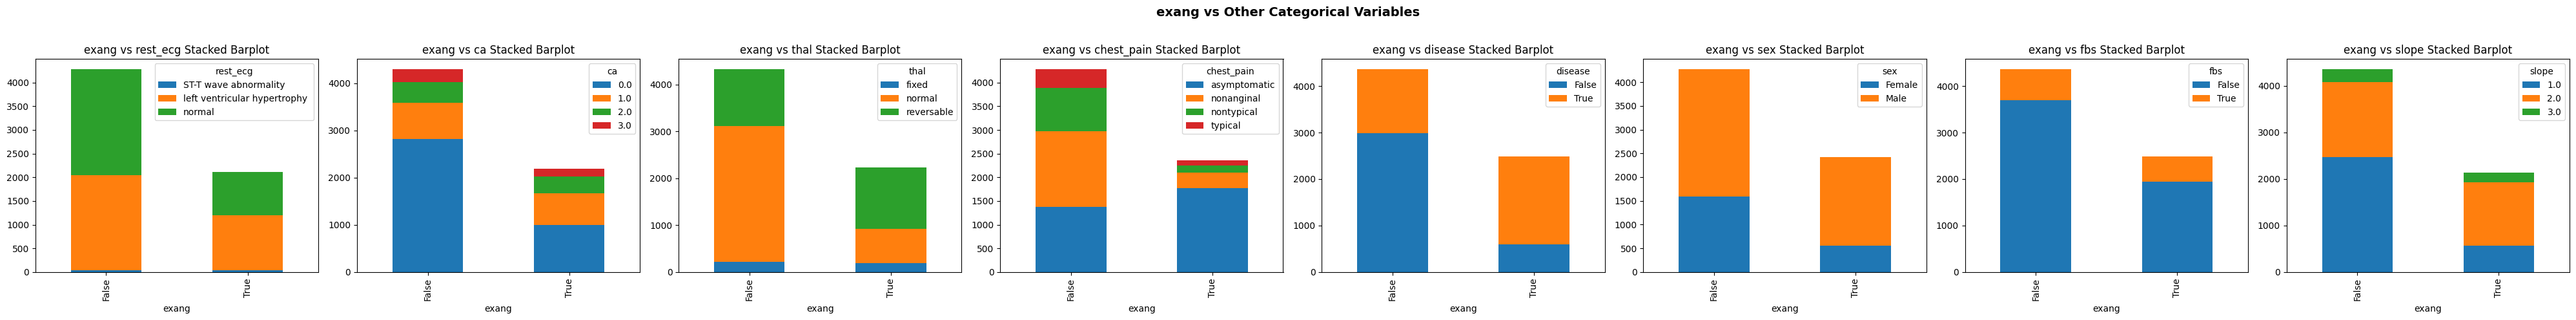


Crosstab Table: exang vs rest_ecg



rest_ecg,ST-T wave abnormality,left ventricular hypertrophy,normal,All
exang,,,,
False,41,2008,2232,4281
True,36,1164,911,2111
All,77,3172,3143,6392



Crosstab Table: exang vs ca



ca,0.000000,1.000000,2.000000,3.000000,All
exang,,,,,
False,2819,764,434,277,4294
True,996,672,355,162,2185
All,3815,1436,789,439,6479



Crosstab Table: exang vs thal



thal,fixed,normal,reversable,All
exang,,,,
False,216,2902,1208,4326
True,189,738,1299,2226
All,405,3640,2507,6552



Crosstab Table: exang vs chest_pain



chest_pain,asymptomatic,nonanginal,nontypical,typical,All
exang,,,,,
False,1380,1588,916,400,4284
True,1776,329,148,111,2364
All,3156,1917,1064,511,6648



Crosstab Table: exang vs disease



disease,False,True,All
exang,,,
False,2981,1381,4362
True,589,1897,2486
All,3570,3278,6848



Crosstab Table: exang vs sex



sex,Female,Male,All
exang,,,
False,1587,2687,4274
True,559,1859,2418
All,2146,4546,6692



Crosstab Table: exang vs fbs



fbs,False,True,All
exang,,,
False,3689,673,4362
True,1948,538,2486
All,5637,1211,6848



Crosstab Table: exang vs slope



slope,1.000000,2.000000,3.000000,All
exang,,,,
False,2468,1609,279,4356
True,570,1363,203,2136
All,3038,2972,482,6492


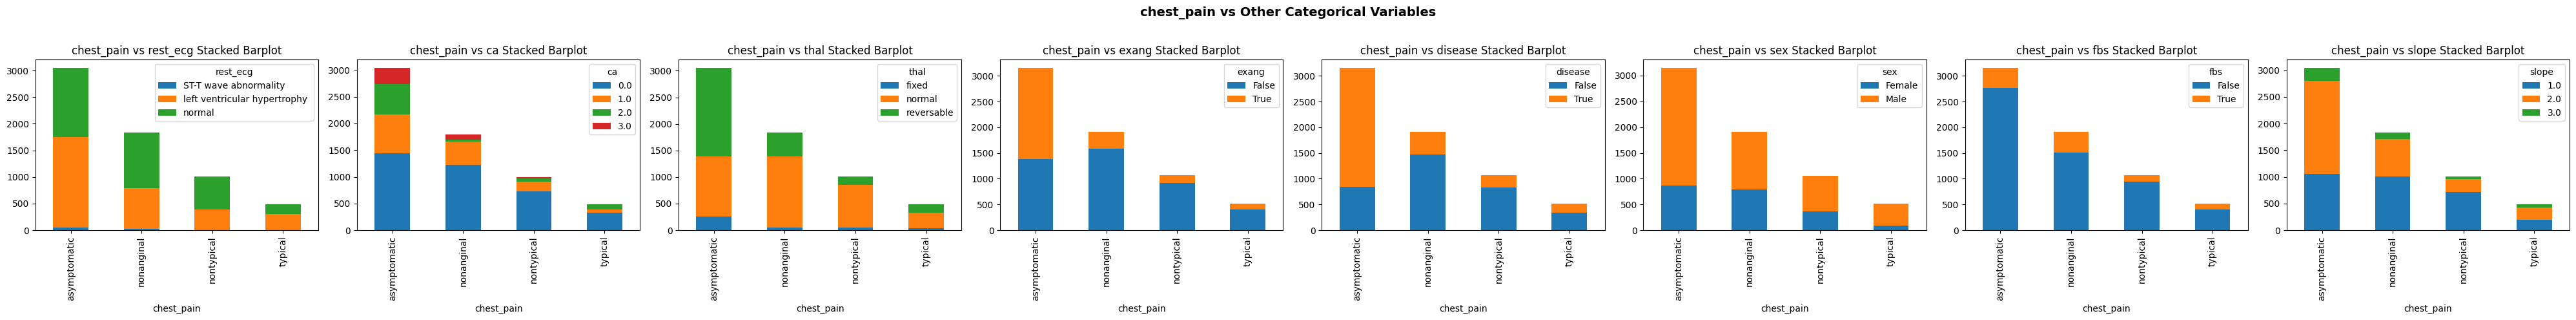


Crosstab Table: chest_pain vs rest_ecg



rest_ecg,ST-T wave abnormality,left ventricular hypertrophy,normal,All
chest_pain,,,,
asymptomatic,54,1701,1295,3050
nonanginal,23,767,1039,1829
nontypical,0,392,619,1011
typical,0,301,187,488
All,77,3161,3140,6378



Crosstab Table: chest_pain vs ca



ca,0.000000,1.000000,2.000000,3.000000,All
chest_pain,,,,,
asymptomatic,1440,726,569,307,3042
nonanginal,1223,439,34,103,1799
nontypical,723,182,66,23,994
typical,328,65,95,0,488
All,3714,1412,764,433,6323



Crosstab Table: chest_pain vs thal



thal,fixed,normal,reversable,All
chest_pain,,,,
asymptomatic,253,1134,1669,3056
nonanginal,50,1341,441,1832
nontypical,47,800,164,1011
typical,41,288,162,491
All,391,3563,2436,6390



Crosstab Table: chest_pain vs exang



exang,False,True,All
chest_pain,,,
asymptomatic,1380,1776,3156
nonanginal,1588,329,1917
nontypical,916,148,1064
typical,400,111,511
All,4284,2364,6648



Crosstab Table: chest_pain vs disease



disease,False,True,All
chest_pain,,,
asymptomatic,839,2317,3156
nonanginal,1476,441,1917
nontypical,830,234,1064
typical,344,167,511
All,3489,3159,6648



Crosstab Table: chest_pain vs sex



sex,Female,Male,All
chest_pain,,,
asymptomatic,872,2279,3151
nonanginal,797,1108,1905
nontypical,369,692,1061
typical,94,417,511
All,2132,4496,6628



Crosstab Table: chest_pain vs fbs



fbs,False,True,All
chest_pain,,,
asymptomatic,2771,385,3156
nonanginal,1505,412,1917
nontypical,948,116,1064
typical,399,112,511
All,5623,1025,6648



Crosstab Table: chest_pain vs slope



slope,1.000000,2.000000,3.000000,All
chest_pain,,,,
asymptomatic,1060,1742,245,3047
nonanginal,1005,707,122,1834
nontypical,716,249,43,1008
typical,201,221,66,488
All,2982,2919,476,6377


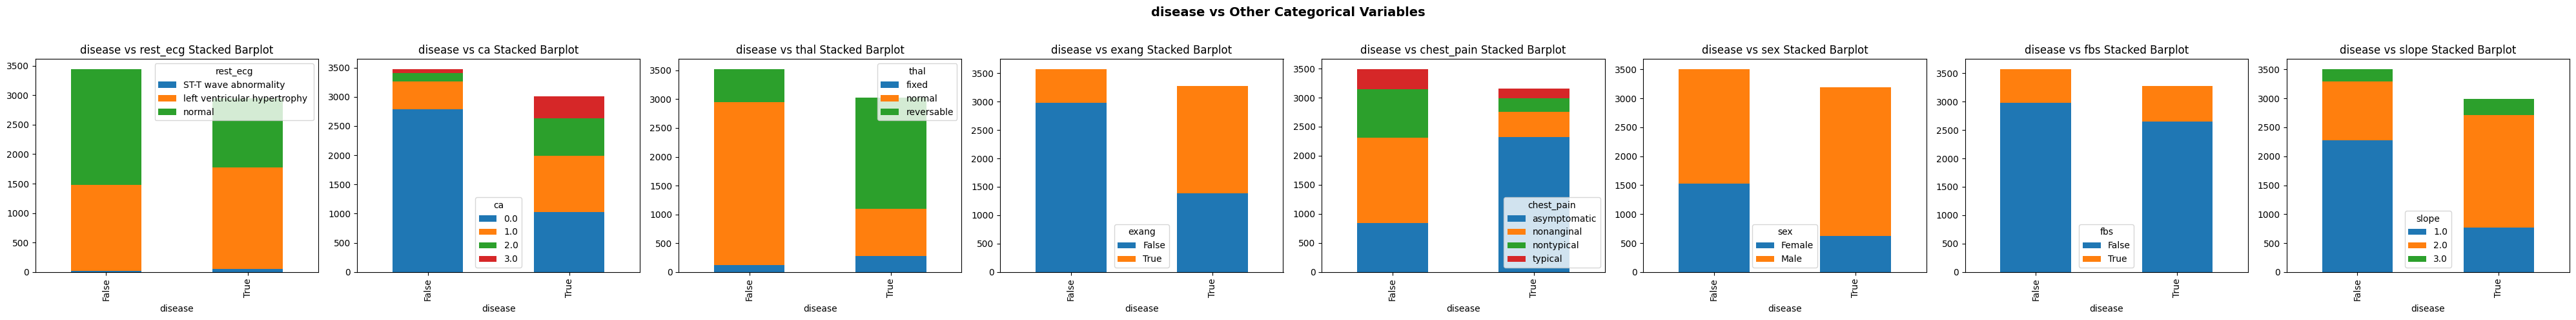


Crosstab Table: disease vs rest_ecg



rest_ecg,ST-T wave abnormality,left ventricular hypertrophy,normal,All
disease,,,,
False,21,1457,1962,3440
True,56,1715,1181,2952
All,77,3172,3143,6392



Crosstab Table: disease vs ca



ca,0.000000,1.000000,2.000000,3.000000,All
disease,,,,,
False,2789,473,145,66,3473
True,1026,963,644,373,3006
All,3815,1436,789,439,6479



Crosstab Table: disease vs thal



thal,fixed,normal,reversable,All
disease,,,,
False,127,2817,576,3520
True,278,823,1931,3032
All,405,3640,2507,6552



Crosstab Table: disease vs exang



exang,False,True,All
disease,,,
False,2981,589,3570
True,1381,1897,3278
All,4362,2486,6848



Crosstab Table: disease vs chest_pain



chest_pain,asymptomatic,nonanginal,nontypical,typical,All
disease,,,,,
False,839,1476,830,344,3489
True,2317,441,234,167,3159
All,3156,1917,1064,511,6648



Crosstab Table: disease vs sex



sex,Female,Male,All
disease,,,
False,1526,1976,3502
True,620,2570,3190
All,2146,4546,6692



Crosstab Table: disease vs fbs



fbs,False,True,All
disease,,,
False,2984,586,3570
True,2653,625,3278
All,5637,1211,6848



Crosstab Table: disease vs slope



slope,1.000000,2.000000,3.000000,All
disease,,,,
False,2273,1020,211,3504
True,765,1952,271,2988
All,3038,2972,482,6492


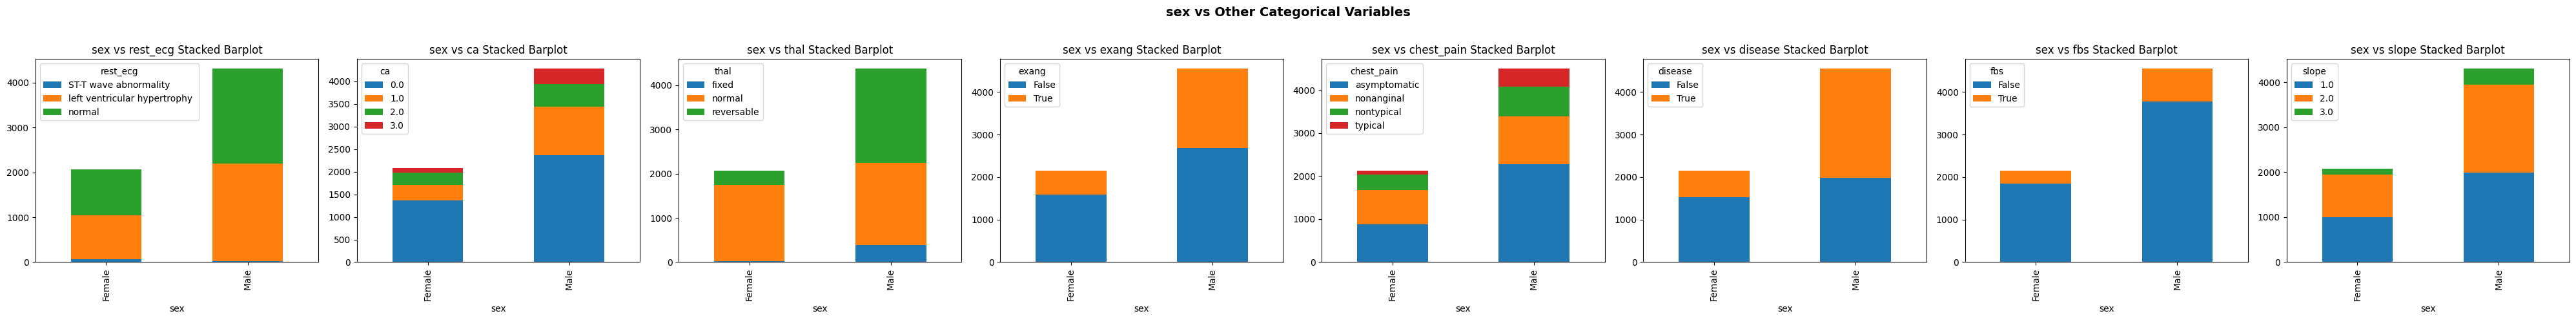


Crosstab Table: sex vs rest_ecg



rest_ecg,ST-T wave abnormality,left ventricular hypertrophy,normal,All
sex,,,,
Female,59,980,1025,2064
Male,18,2175,2115,4308
All,77,3155,3140,6372



Crosstab Table: sex vs ca



ca,0.000000,1.000000,2.000000,3.000000,All
sex,,,,,
Female,1371,339,276,95,2081
Male,2365,1079,497,339,4280
All,3736,1418,773,434,6361



Crosstab Table: sex vs thal



thal,fixed,normal,reversable,All
sex,,,,
Female,19,1721,326,2066
Male,384,1853,2134,4371
All,403,3574,2460,6437



Crosstab Table: sex vs exang



exang,False,True,All
sex,,,
Female,1587,559,2146
Male,2687,1859,4546
All,4274,2418,6692



Crosstab Table: sex vs chest_pain



chest_pain,asymptomatic,nonanginal,nontypical,typical,All
sex,,,,,
Female,872,797,369,94,2132
Male,2279,1108,692,417,4496
All,3151,1905,1061,511,6628



Crosstab Table: sex vs disease



disease,False,True,All
sex,,,
Female,1526,620,2146
Male,1976,2570,4546
All,3502,3190,6692



Crosstab Table: sex vs fbs



fbs,False,True,All
sex,,,
Female,1840,306,2146
Male,3780,766,4546
All,5620,1072,6692



Crosstab Table: sex vs slope



slope,1.000000,2.000000,3.000000,All
sex,,,,
Female,997,952,123,2072
Male,1984,1965,353,4302
All,2981,2917,476,6374


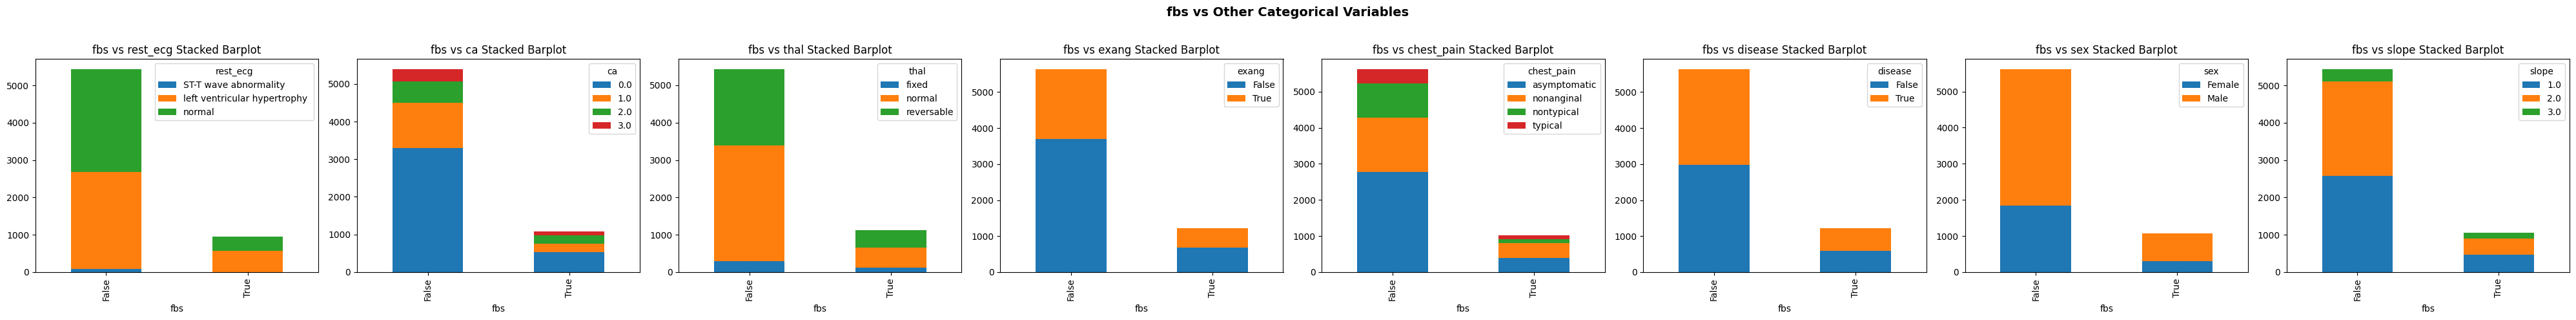


Crosstab Table: fbs vs rest_ecg



rest_ecg,ST-T wave abnormality,left ventricular hypertrophy,normal,All
fbs,,,,
False,77,2611,2748,5436
True,0,561,395,956
All,77,3172,3143,6392



Crosstab Table: fbs vs ca



ca,0.000000,1.000000,2.000000,3.000000,All
fbs,,,,,
False,3292,1211,562,329,5394
True,523,225,227,110,1085
All,3815,1436,789,439,6479



Crosstab Table: fbs vs thal



thal,fixed,normal,reversable,All
fbs,,,,
False,283,3112,2037,5432
True,122,528,470,1120
All,405,3640,2507,6552



Crosstab Table: fbs vs exang



exang,False,True,All
fbs,,,
False,3689,1948,5637
True,673,538,1211
All,4362,2486,6848



Crosstab Table: fbs vs chest_pain



chest_pain,asymptomatic,nonanginal,nontypical,typical,All
fbs,,,,,
False,2771,1505,948,399,5623
True,385,412,116,112,1025
All,3156,1917,1064,511,6648



Crosstab Table: fbs vs disease



disease,False,True,All
fbs,,,
False,2984,2653,5637
True,586,625,1211
All,3570,3278,6848



Crosstab Table: fbs vs sex



sex,Female,Male,All
fbs,,,
False,1840,3780,5620
True,306,766,1072
All,2146,4546,6692



Crosstab Table: fbs vs slope



slope,1.000000,2.000000,3.000000,All
fbs,,,,
False,2572,2541,323,5436
True,466,431,159,1056
All,3038,2972,482,6492


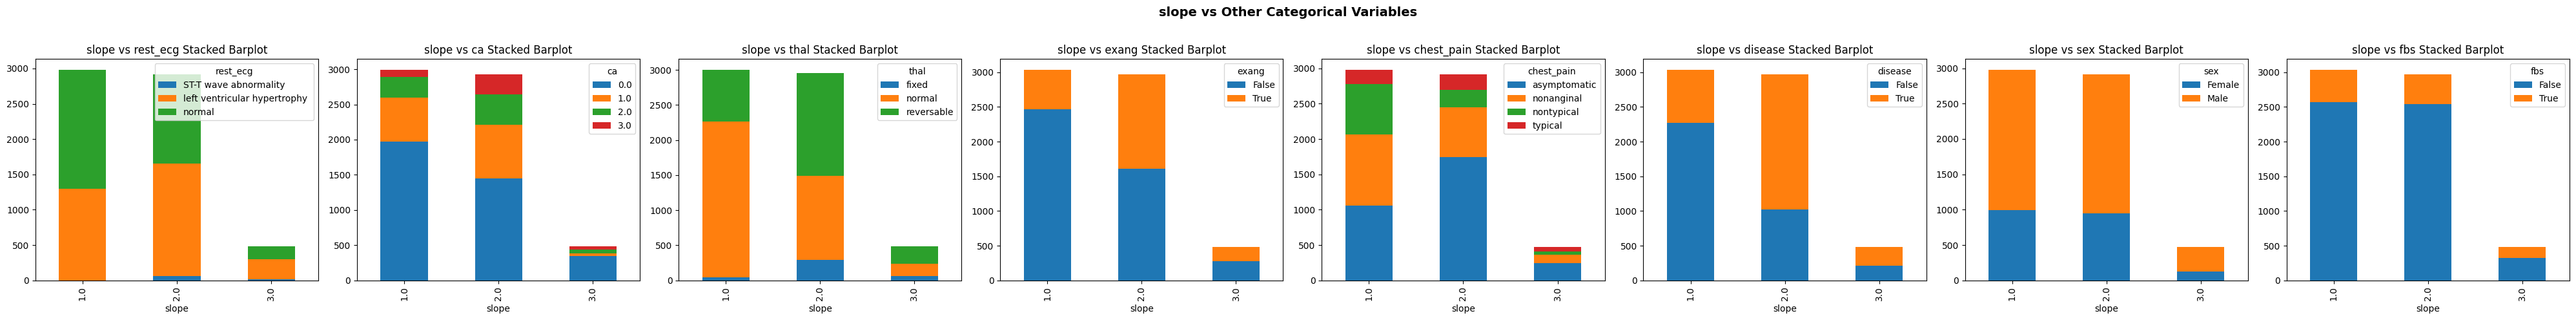


Crosstab Table: slope vs rest_ecg



rest_ecg,ST-T wave abnormality,left ventricular hypertrophy,normal,All
slope,,,,
1.000000,0,1294,1691,2985
2.000000,59,1592,1265,2916
3.000000,18,280,181,479
All,77,3166,3137,6380



Crosstab Table: slope vs ca



ca,0.000000,1.000000,2.000000,3.000000,All
slope,,,,,
1.000000,1971,630,293,101,2995
2.000000,1452,760,429,289,2930
3.000000,347,37,52,46,482
All,3770,1427,774,436,6407



Crosstab Table: slope vs thal



thal,fixed,normal,reversable,All
slope,,,,
1.000000,42,2219,743,3004
2.000000,293,1201,1456,2950
3.000000,61,174,247,482
All,396,3594,2446,6436



Crosstab Table: slope vs exang



exang,False,True,All
slope,,,
1.000000,2468,570,3038
2.000000,1609,1363,2972
3.000000,279,203,482
All,4356,2136,6492



Crosstab Table: slope vs chest_pain



chest_pain,asymptomatic,nonanginal,nontypical,typical,All
slope,,,,,
1.000000,1060,1005,716,201,2982
2.000000,1742,707,249,221,2919
3.000000,245,122,43,66,476
All,3047,1834,1008,488,6377



Crosstab Table: slope vs disease



disease,False,True,All
slope,,,
1.000000,2273,765,3038
2.000000,1020,1952,2972
3.000000,211,271,482
All,3504,2988,6492



Crosstab Table: slope vs sex



sex,Female,Male,All
slope,,,
1.000000,997,1984,2981
2.000000,952,1965,2917
3.000000,123,353,476
All,2072,4302,6374



Crosstab Table: slope vs fbs



fbs,False,True,All
slope,,,
1.000000,2572,466,3038
2.000000,2541,431,2972
3.000000,323,159,482
All,5436,1056,6492


In [ ]:
for col in categorical_columns:
    bivariate_analysis_cat_vs_cat(col, categorical_columns)


#### **Categorical vs Numerical Variables**

In [64]:
def bivariate_analysis_num_vs_cat(numerical_column, categorical_columns):
    """
    Function to plot bivariate analysis between a numerical column and multiple categorical columns.

    Parameters:
    - numerical_column: The numerical column to compare against categorical columns.
    - categorical_columns: List of categorical column names.
    """

    for cat_col in categorical_columns:
        plt.figure(figsize=(8, 3)) 
        plt.suptitle(f"{numerical_column} vs {cat_col}", fontsize=12, fontweight="bold")

        # Boxplot
        plt.subplot(1, 2, 1)
        sns.boxplot(x=hd_df[cat_col], y=hd_df[numerical_column])
        plt.title("Boxplot", fontsize=9)
        plt.xlabel(cat_col, fontsize=9)
        plt.ylabel(numerical_column, fontsize=9)

        # Barplot
        plt.subplot(1, 2, 2)
        sns.barplot(
            data=hd_df,
            x=cat_col,
            y=numerical_column,
            errorbar="ci",
            capsize=0.05,
            hue=cat_col,
            palette="coolwarm",
        )
        plt.title("Barplot", fontsize=10)
        plt.xlabel(cat_col, fontsize=9)
        plt.ylabel(numerical_column, fontsize=9)
        plt.legend(fontsize=5)

        # Adjust spacing to make it more compact
        plt.subplots_adjust(wspace=0.4, hspace=0.4)
        plt.tight_layout(rect=[0, 0, 1, 0.95])

        plt.show()

    return None


In [ ]:
for num_col in numerical_columns:
    bivariate_analysis_num_vs_cat(num_col, categorical_columns)

### **5. Multivariate Analysis**